# Data_Preprocess
### 제조현장용 Scene-Text Recognition학습 AI 데이터셋
<hr>

In [1]:
# wget 명령어로 dropbox로부터 실습에 활용할 파일 다운로드
!wget -O datasets.zip 'https://www.dropbox.com/scl/fi/3xs1f9l1834zge70iqafi/datasets.zip?rlkey=nhvy0j7jlr4y43lwi809osomn&dl=0'
!wget -O notebook_images.zip 'https://www.dropbox.com/scl/fi/rfkvhgqeenv043b7ntoc0/notebook_images.zip?rlkey=ukl83j4nxemp2u19wpsvhjxpf&dl=0'

--2024-06-05 11:52:12--  https://www.dropbox.com/scl/fi/3xs1f9l1834zge70iqafi/datasets.zip?rlkey=nhvy0j7jlr4y43lwi809osomn&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7b8677997fc72bf37f7190b7f3.dl.dropboxusercontent.com/cd/0/inline/CUTcI-tMw1oFpZk7K9VUrJnw7VGqpWpw_E9lq7Q_bXlzctsfB6UcrLi89Eyzop3ZgeXashzEOl_Flnq5VH63kfG_dLmvhp7pTNrn6LzQ2_F42jjIcGRuxrXX0_zIAszjA_U/file# [following]
--2024-06-05 11:52:13--  https://uc7b8677997fc72bf37f7190b7f3.dl.dropboxusercontent.com/cd/0/inline/CUTcI-tMw1oFpZk7K9VUrJnw7VGqpWpw_E9lq7Q_bXlzctsfB6UcrLi89Eyzop3ZgeXashzEOl_Flnq5VH63kfG_dLmvhp7pTNrn6LzQ2_F42jjIcGRuxrXX0_zIAszjA_U/file
Resolving uc7b8677997fc72bf37f7190b7f3.dl.dropboxusercontent.com (uc7b8677997fc72bf37f7190b7f3.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6035:15::a27d:550f
Connecting 

In [2]:
#unzip 명령어를 통해 압축 파일을 해제해 줍니다.
!unzip notebook_images.zip

Archive:  notebook_images.zip
   creating: notebook_images/
   creating: notebook_images/.ipynb_checkpoints/
  inflating: notebook_images/YOLO_flow.jpg  
  inflating: notebook_images/wandb_monitor_rec.PNG  
  inflating: notebook_images/wandb_monitor_det.PNG  
  inflating: notebook_images/Terminal.PNG  
  inflating: notebook_images/yaml_sample.PNG  
  inflating: notebook_images/OD_task.png  
  inflating: notebook_images/Wandb.PNG  
  inflating: notebook_images/OD_image.PNG  
  inflating: notebook_images/task_image.PNG  
  inflating: notebook_images/paddleocr_example.PNG  
  inflating: notebook_images/OD_flow.PNG  
  inflating: notebook_images/STR_example.PNG  
  inflating: notebook_images/iou.png  
  inflating: notebook_images/extracted_text.jpg  
  inflating: notebook_images/det_txt_sample.PNG  
  inflating: notebook_images/det_text_sample.PNG  
  inflating: notebook_images/covered_image_example.jpg  


In [3]:
# unzip 명령어를 통해 압축 파일을 해제해 줍니다. 파일 하나 하나 출력되어 로그가 매우 길게 표시 되므로 -qq 옵션을 통해 출력 없이 압축 풀기를 수행합니다.
!unzip -qq datasets.zip

### 데이터 전처리 및 모델링 전략
- 이 장에서는 현재 가지고 있는 이미지 및 json 파일을 전체 문자열 덩어리 단위 형식으로 변환하는 과정을 설명합니다.

- EDA 과정을 통해 이미지에는 크기 차이가 나는 두 개의 스크린이 있고, 이들 스크린은 동일한 숫자를 표시한다는 것을 알 수 있었습니다.
- **이로 인해 두 스크린 중에서 한 스크린만 정확하게 인식하면 충분합니다. 모델이 큰 스크린의 숫자에 주로 집중하도록 하기 위해, 큰 스크린의 정보만을 포함하는 어노테이션 데이터를 생성하며, 원본 이미지에서는 작은 스크린을 제거(마스킹)하는 작업을 수행합니다.**

### 데이터셋 구성 : 원본 데이터 셋

-  이미지 : images폴더 내의 00001.jpg ~ 03896.jpg (약 3894 장)

-  json : datalist 폴더 내의 train_data.json, valid_data.json, test_data.json 등

### 데이터셋 구성 : YOLOv8 요구 학습 데이터 셋

-  **YOLOv8 요구 데이터셋 디렉토리 구성:**
    - data
        - train
            - image 파일
            - 해당 image에 대한 어노테이션 txt파일(각 클래스의 라벨과 바운딩 박스 좌표)
        - valid
            - image 파일
            - 해당 image에 대한 어노테이션 txt파일(각 클래스의 라벨과 바운딩 박스 좌표)
        - test
            - image 파일
            - 해당 image에 대한 어노테이션 txt파일(각 클래스의 라벨과 바운딩 박스 좌표)
    - data.yaml:
        - "train": "train dataset의 절대 경로"
        - "val": "valid dataset의 절대 경로"
        - "test": "test dataset의 절대 경로"
        - "names": ['각 라벨의 클래스명']
        - "nc": 총 라벨의 갯수(int)


- YOLOv8에 적합한 어노테이션 데이터와 현재 보유하고 있는 어노테이션 데이터의 형식은 다릅니다.
- 현재 보유 중인 어노테이션 데이터는 큰 화면과 작은 화면 모두에 대한 개별 숫자의 바운딩 박스 좌표를 갖고 있습니다.
- 우리는 모델이 큰 스크린의 숫자에 집중하도록 하기 위해 큰 스크린의 정보만을 포함하는 어노테이션 파일을 yolo형식에 맞게끔 생성해야 합니다.


- 현재 원본 json파일의 바운딩 박스 형식:
    - 개별 숫자에 대한
    - [좌상단x좌표, 좌상단y좌표, 우상단x좌표, 우상단y좌표, 우하단x좌표, 우하단y좌표, 좌하단x좌표, 좌하단y좌표]



- **YOLOv8 요구 annotaions.txt 파일 형식:**
    - [object-class] [x_center] [y_center] [width] [height]

- 따라서 이를 위해 원본 데이터셋을 적절하게 가공해주는 작업이 필요합니다.


- **큰 화면의 숫자만 포함되고, 작은 화면의 숫자가 가려진 이미지의 예시는 아래와 같습니다.**

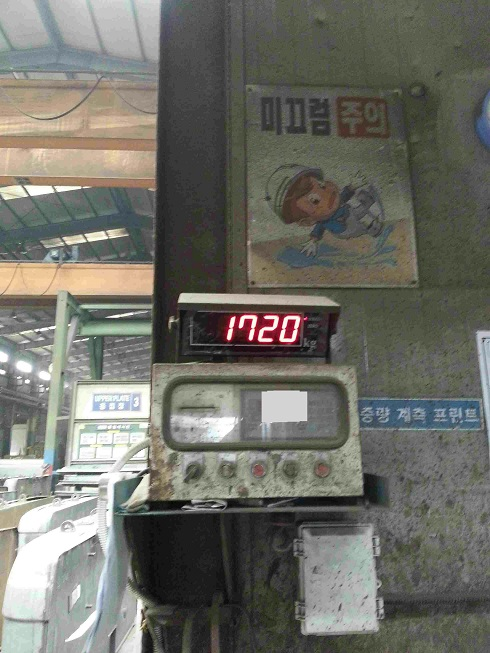

In [ ]:
from IPython.display import Image as show_image# ipynb 파일의 cell에서 이미지를 시각화하기 위한 라이브러리
show_image('notebook_images/covered_image_example.jpg')

- **YOLO 형식에 맞는 이미지의 어노테이션 파일 예시는 아래와 같습니다.**

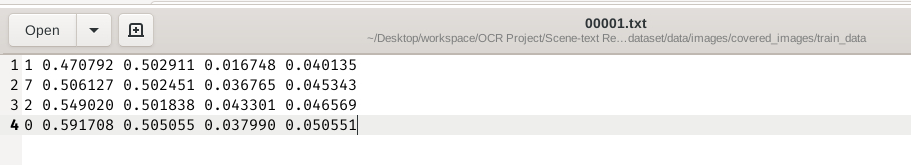

In [ ]:
show_image('notebook_images/det_text_sample.PNG')

- **YOLO에서 Data를 읽어오기 위한 YAML파일 예시는 아래와 같습니다.**

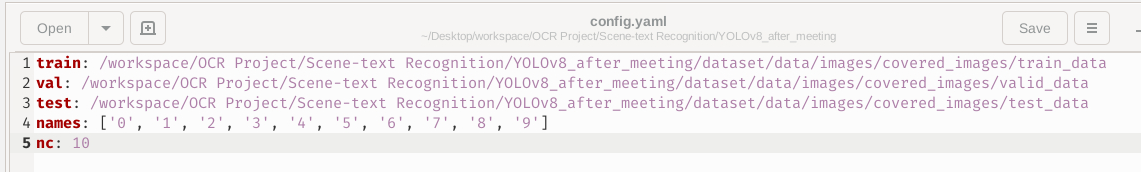

In [ ]:
show_image('notebook_images/yaml_sample.PNG')

- 보유하고 있는 이미지와 json파일로 위와 같은 형식의 이미지와 txt파일 그리고 yaml파일을 생성합니다.

### 필요 라이브러리 임포트

In [ ]:
import os                   # 시스템 경로 및 파일 관련 기능을 사용하기 위한 라이브러리
import json                 # JSON 데이터를 다루기 위한 라이브러리
import glob                 # 파일 패턴 매칭을 위한 라이브러리
import numpy as np          # 다차원 배열 및 수학 연산 처리를 위한 라이브러리
import pandas as pd         # 데이터프레임을 활용한 데이터 조작 및 분석을 위한 라이브러리
from ast import literal_eval  # 문자열을 코드로 변환하는 함수
from PIL import Image, ImageDraw  # 이미지 처리를 위한 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
from tqdm import tqdm        # 반복문의 진행 상황을 표시하는 라이브러리
import random                # 랜덤 함수 사용을 위한 라이브러리
import yaml                  # yaml파일을 다루기 위한 라이브러리
from collections import OrderedDict # collections에서 제공하는 항목의 순서를 기억하는 딕셔너리
import shutil                # 파일의 이동과 복사를 위한 라이브러리

## YOLOv8 Custom Dataset 만들기

In [ ]:
# 공통 작업 - 파일 경로 지정
# 아래의 파일 경로는 실제 환경에 맞게 수정해 주시기 바랍니다.


# train, valid, test json 파일 경로 지정
train_label_path = './dataset/datalist/train_data.json'
valid_label_path = './dataset/datalist/valid_data.json'
test_label_path = './dataset/datalist/test_data.json'

# 원본 이미지 폴더(images)가 들어있는 경로 지정.
img_root_path = './dataset/data/images'

In [ ]:
# 작은 화면을 가린 이미지와 txt파일을 저장할 경로를 작성해 주세요
train_output_dir = './dataset/data/covered_images/train_data'
valid_output_dir = './dataset/data/covered_images/valid_data'
test_output_dir = './dataset/data/covered_images/test_data'

# 설정된 경로에 폴더를 생성합니다. 폴더가 이미 존재하는 경우 오류를 방지하기 위해 exist_ok=True 옵션을 사용합니다.
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(valid_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

In [ ]:
# 필요한 함수를 미리 정의합니다.

def find_bigbox(bbox_info):
    '''
    이미지에서 큰 스크린의 좌표만 추출하는 함수
    큰 화면의 개별 bounding box와 작은 화면의 개별 bounding box 크기가 몇 배 이상 차이나는 것을 활용함
    모든 박스 중에서 가장 긴 세로길이를 추출하고, 해당 길이의 65% 미만의 세로길이를 가진 박스는 작은 박스로 간주하여 큰 박스 인덱스만 리턴
    '''
    bbox_info = np.array(bbox_info) # 리스트 어레이로 변환
    longest_length = max(bbox_info[:,7]-bbox_info[:,1]) # 좌하단y - 좌상단y 의 값중 가장 큰 값을 도출하여 가장 큰 숫자의 길이를 구함
    bigbox_coord_index = np.where(bbox_info[:,7]-bbox_info[:,1]>longest_length*0.65)[0] # 가장 큰 숫자의 65%보다 큰 bounding box만 도출
    return bigbox_coord_index

def find_smallbox(bbox_info):
    '''
    이미지에서 작은 스크린의 좌표만 추출하는 함수
    큰 화면의 개별 bounding box와 작은 화면의 개별 bounding box 크기가 몇 배 이상 차이나는 것을 활용함
    모든 박스 중에서 가장 작은 세로길이를 추출하고, 해당 길이의 150% 미만의 세로길이를 가진 박스는 작은 박스로 간주하여 작은 박스 인덱스만 리턴
    '''
    bbox_info = np.array(bbox_info) # 리스트 어레이로 변환
    shortest_length = min(bbox_info[:,7]-bbox_info[:,1]) # 좌하단y - 좌상단y 의 값중 가장 작은 값을 도출하여 가장 작은 숫자의 길이를 구함
    samllbox_coord_index = np.where(bbox_info[:,7]-bbox_info[:,1]<shortest_length*1.5)[0] # 가장 작은 숫자의 1.5배 보다 작은 bounding box만 도출
    return samllbox_coord_index


def find_rightmost(bigbox_index, sample_bbox_info):
    '''
    01908.jpg 이미지 같은 경우 텍스트 라벨링이 왼쪽->오른쪽 순서대로 되어 있지 않습니다.
    우상단 x좌표의 값을 이용해 가장 우측에 위치한 텍스트가 몇번째 bounding box인지 리턴합니다.
    '''

    rightmost_index = np.argmax(np.array(sample_bbox_info)[bigbox_index][:,2]) # bigbox 내에서 가장 오른쪽에 있는 인덱스를 도출함(bigbox내에서 몇번째인지)
    rightmost_index = bigbox_index[rightmost_index] # n번째 bbox 값 도출

    return rightmost_index

def get_righttext(bigbox_index, sample_bbox_info):
    text_order = np.argsort(np.array(sample_bbox_info)[:,0]) # 모든 박스를 x 순서대로 정렬합니다.
    bigbox_text_order = [x for x in text_order if x in bigbox_index] # 작은 박스에 해당하는 인덱스는 제거합니다.
    return bigbox_text_order # 글자 순서(x순서)대로 정렬된 x박스 순서를 반환합니다.

#### 작은 화면을 회색으로 가린 데이터(이미지) 생성

In [ ]:
# 작은 텍스트 부분이 가려진 이미지 생성

def make_covered_image(json_path, img_root_path, covered_image_path):
    """
    모델이 큰 화면에만 집중해서 학습할수 있도록 이미지의 특정 영역(작은 화면)을 가린채로 저장하는 함수.

    Parameters:
    - json_path: JSON 어노테이션 파일의 경로
    - img_root_path: 원본 이미지가 저장된 경로
    - covered_image_path: 잘린 이미지를 저장할 경로
    """

    # JSON 파일 로드
    with open(json_path) as load_f:
        json_flie = json.load(load_f)

    # 파일명을 기준으로 JSON 데이터를 순회
    for filename in tqdm(json_flie):

        label_info = json_flie[filename]

        # 이미지 파일 로드
        sample_image = Image.open(f'{img_root_path}/{filename.replace("images/", "")}')  # 기존 파일명이 "images/파일명.jpg"
                                                                                         # 라서 images/ 뒤의 파일명만을 이용
        # Bounding Box 정보 추출
        sample_bbox_info = np.array(label_info['content_ann']['bboxes']) # 좌표 정보 추출

        # 작은 화면의 bbox 인덱스를 추출
        bigbox_index = find_bigbox(sample_bbox_info) #큰 화면의 bbox 좌표 인덱스 추출
        smallbox_list = np.delete(sample_bbox_info, bigbox_index, 0) # Boundig Box 정보에서 작은 화면의 bbox 정보만 추출


        draw = ImageDraw.Draw(sample_image, 'RGBA')
        box_color_RGBA  = (211,211,211) # 테두리 색깔 결정
        fill_color_RGBA = (211,211,211) # 채우기 색깔 결정

        # smallbox 로 탐지된 좌표에 대해서만 bounding box 를 활용하여 회색으로 가려줍니다.
        for box in smallbox_list:
            draw.rectangle((box[0]-50,box[1]-50,box[4]+50,box[5]+50), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)

        # 작은 글자가 회색으로 가려진 이미지 저장
        sample_image.save(f'{covered_image_path}/{filename.replace("images/", "")}')

In [ ]:
# 아래쪽 작은 패널이 회색으로 가려진 이미지 생성
make_covered_image('./dataset/datalist/train_data.json', img_root_path, train_output_dir)
make_covered_image('./dataset/datalist/valid_data.json', img_root_path, valid_output_dir)
make_covered_image('./dataset/datalist/test_data.json', img_root_path, test_output_dir)

100%|██████████| 390/390 [00:27<00:00, 13.98it/s]


#### 작은 화면을 회색으로 가린 데이터(어노테이션) 생성

In [ ]:
def json_to_yolo_format(json_path, output_dir):
    """
    JSON 어노테이션을 YOLO 형식의 .txt 파일로 변환합니다.

    Parameters:
    - json_path: JSON 어노테이션 파일의 경로
    - output_dir: YOLO 어노테이션을 저장할 폴더 경로
    """

    # JSON 파일 로드
    with open(json_path) as load_f:
        json_file = json.load(load_f)

    # 파일명을 기준으로 JSON 데이터를 순회
    for filename, meta in tqdm(json_file.items()):

        img_height = meta['height'] # 해당 이미지의 높이
        img_width = meta['width'] # 해당 이미지의 너비

        # 큰 화면의 bbox 인덱스를 추출
        bbox_info = np.array(meta['content_ann']['bboxes'])
        bigbox_index = find_bigbox(bbox_info)
        bigboxes = bbox_info[bigbox_index]

        # 큰 화면의 바운딩 박스를 왼쪽에서 오른쪽 순으로 정렬
        sorted_boxes = sorted(list(zip(bigboxes, bigbox_index)), key=lambda x: x[0][0])
        sorted_bigboxes, sorted_indexes = zip(*sorted_boxes)

        yolo_boxes = []
        for idx, box in enumerate(sorted_bigboxes):
            # YOLO 포맷에 맞게 bbox 변환
            x_center = (box[0] + box[2]) / 2.0 # 좌상단 x좌표와 우상단 x좌표의 절반
            y_center = (box[1] + box[5]) / 2.0 # 좌상단 y좌표와 우하단 y좌표의 절반
            width = box[2] - box[0] # 해당 바운딩 박스의 너비(우상단 x좌표 - 좌상단 x좌표)
            height = box[5] - box[1] # 해당 바운딩 박스의 높이(우하단 y좌표 - 좌상단 y좌표)

            # 바운딩 박스의 좌표를 해당 이미지의 너비와 높이로 정규화
            x_center /= img_width
            y_center /= img_height
            width /= img_width
            height /= img_height

            # 클래스 정보
            class_id = meta['content_ann']['texts'][sorted_indexes[idx]]  # 큰 화면의 bbox에 해당하는 클래스 추출
            yolo_boxes.append((class_id, x_center, y_center, width, height))

        # 파일 저장
        with open(f"{output_dir}/{filename.replace('images/', '').replace('.jpg', '.txt')}", "w") as txt_file:
            for box in yolo_boxes:
                txt_file.write(f"{box[0]} {box[1]:.6f} {box[2]:.6f} {box[3]:.6f} {box[4]:.6f}\n")

In [ ]:
train_output_dir

'./dataset/data/covered_images/train_data'

In [ ]:
# 아래쪽 작은 패널이 회색으로 가려진 이미지에 대한 어노테이션 생성
json_to_yolo_format(train_label_path, train_output_dir)
json_to_yolo_format(valid_label_path, valid_output_dir)
json_to_yolo_format(test_label_path, test_output_dir)

100%|██████████| 390/390 [00:00<00:00, 7578.42it/s]


#### YOLO에서 데이터를 활용하기 위한 config.yaml 파일 생성

In [ ]:
# yaml 파일의 내용을 순서를 기억하는 딕셔너리를 사용해서 생성
data_dict = OrderedDict({
    "train": os.path.abspath("./dataset/data/covered_images/train_data"),  # 해당 경로는 절대경로 형태로 기입이 필요합니다. 그렇지 않을 경우 자체적으로 절대경로를 만드는 과정에서 에러가 발생할 수 있습니다.
    "val": os.path.abspath("./dataset/data/covered_images/valid_data"),
    "test": os.path.abspath("./dataset/data/covered_images/test_data"),
    "names": ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    "nc": 10
})

# dumper.represent_dict는 OrderedDict객체를 yaml 형식으로 매핑 하기 위한 함수
def ordered_dict_representer(dumper, data):
    return dumper.represent_dict(data.items())

# OrderedDict객체를 yaml 형식으로 매핑하여 yaml 타입으로 변환
# Dumper=yaml.SafeDumper는 PyYAML에서 제공하는 안전한 Dumper 임의의 파이썬 코드 실행을 방지하기 위함
yaml.add_representer(OrderedDict, ordered_dict_representer, Dumper=yaml.SafeDumper)

# config.yaml을 쓰기(w)모드로 연 후, outfile로 참조
# dump 함수로 파이썬 객체를 yaml 형식의 문자열로 직렬화(여기서는 data_dict)
# outfile - yaml 형식의 문자열이 쓰여질 파일 객체
# default_flow_style - YAML에는 block 스타일과 flow 스타일로 데이터를 표현할 수 있는데, 디폴트는 flow 스타일
# Block 스타일 예시 : key1 : value1
# flow 스타일 예시 : {key1: value1}
with open("config.yaml", 'w') as outfile:
    yaml.dump(data_dict, outfile, Dumper=yaml.SafeDumper, default_flow_style=None)

In [ ]:
with open(test_label_path, 'r', encoding="utf-8") as f:
    test_data = json.load(f)

# 화면이 가려지지 않은 테스트 이미지를 저장할 디렉터리 경로
real_test_path = './dataset/data/real_test_images'

# 디렉터리 생성 (이미 디렉터리가 존재하지 않는 경우에만)
if not os.path.exists(real_test_path):
    os.makedirs(real_test_path)

# test_data.json에서 이미지 파일명 추출 및 해당 이미지를 real_test_path로 복사
for filename in test_data.keys():
    # 파일 경로 생성
    src_path = os.path.join(img_root_path, filename.replace('images/', ''))
    dest_path = os.path.join(real_test_path, filename.replace('images/', ''))

    # 이미지 복사
    shutil.copy(src_path, dest_path)

print(f"Test images copied to {real_test_path}")

Test images copied to ./dataset/data/real_test_images


# Model_train_eval_inference

# 정확도 계산을 위한 함수(label_path, inference_results)

In [ ]:
def compute_each_label_accuracy(label_path: str, inference_results: list) -> float:
    # 실제 라벨 값들을 저장하기 위한 딕셔너리
    true_labels = {}
    # 지정된 경로의 모든 파일을 순회
    for file in os.listdir(label_path):
        # 파일 확장자가 .txt인 경우만 처리
        if file.endswith('.txt'):
            # 해당 파일을 열어서 내용을 read함
            with open(os.path.join(label_path, file), 'r') as f:
                lines = f.readlines()
                # 각 줄에서 클래스 번호만 추출하여 리스트에 저장
                classes = [int(line.strip().split()[0]) for line in lines]
                true_labels[file] = classes # 파일 이름을 키로 하고, 추출된 클래스들을 값으로 하는 항목을 딕셔너리에 추가

    # 예측된 라벨 값들을 저장하기 위한 딕셔너리
    predicted_labels = {}
    # 추론 결과를 순회
    for result in inference_results:
        # 각 바운딩 박스의 x좌표를 기준으로 데이터를 정렬
        sorted_data = sorted(result.boxes.data.tolist(), key=lambda x: x[0])
        # 정렬된 데이터에서 클래스 번호(맨 마지막 값)만 추출하여 리스트에 저장
        classes = [int(item[-1]) for item in sorted_data]
        # 이미지 파일 이름을 키로 하고, 추출된 클래스들을 값으로 하는 항목을 딕셔너리에 추가
        predicted_labels[os.path.basename(result.path)] = classes

    # 정확도를 계산하기 위한 변수 초기화
    total_count = 0
    correct_count = 0
    # 실제 라벨 값을 순회
    for filename, true_classes in true_labels.items():
        # 예측된 라벨 값 중에서 해당 이미지 파일의 라벨 값을 가져옴 (없으면 빈 리스트를 사용)
        pred_classes = predicted_labels.get(filename.replace('.txt', '.jpg'), []) # 이미지 파일 확장자가 .jpg라고 가정
        # 전체 라벨 수를 누적
        total_count += len(true_classes)
        # 일치하는 라벨 수를 누적
        correct_count += sum(t == p for t, p in zip(true_classes, pred_classes))

    # 전체 라벨 수가 0이면 정확도도 0으로 설정
    accuracy = 0 if total_count == 0 else correct_count / total_count

    # 정확도, total_count, correct_count를 반환
    return accuracy, total_count, correct_count

## 각 이미지 기준 정확도 계산 함수

In [ ]:
def compute_image_accuracy(label_path: str, inference_results: list) -> (float, int, int):
    # 실제 라벨을 추출
    true_labels = {}
    for file in os.listdir(label_path):
        if file.endswith('.txt'):
            with open(os.path.join(label_path, file), 'r') as f:
                lines = f.readlines()
                classes = [int(line.strip().split()[0]) for line in lines]
                true_labels[file] = classes

    # 예측된 결과 가져오기
    predicted_labels = {}
    for result in inference_results:
        # 각 바운딩 박스의 x좌표를 기준으로 정렬
        sorted_data = sorted(result.boxes.data.tolist(), key=lambda x: x[0])
        # 정렬된 결과에서 클래스만 추출
        classes = [int(item[-1]) for item in sorted_data]
        predicted_labels[os.path.basename(result.path)] = classes

    # 실제 라벨을 기준으로 예측 라벨과 비교하여 accuracy_score 계산
    total_images = len(true_labels)
    correct_images = 0
    for filename, true_classes in true_labels.items():
        pred_classes = predicted_labels.get(filename.replace('.txt', '.jpg'), []) # 이미지가 .jpg 확장자라고 가정

        if true_classes == pred_classes:
            correct_images += 1

    accuracy = correct_images / total_images if total_images > 0 else 0

    return accuracy, total_images, correct_images

# Load a pre-trained model

In [ ]:
!pip3 install ultralytics # 처음 설치 시 실행 후 런타임 재시작 필요

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import ultralytics
from ultralytics import YOLO
from IPython.display import Image as show_image
import glob
import random
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.0/78.2 GB disk)


In [ ]:
model = YOLO('yolov8n.pt') #yolov8n(나노), yolov8s(스몰), yolov8m(미디움), yolov8l(라지), yolov8x(엑스트라) 등이 있음

100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]


In [ ]:
print(type(model.names), len(model.names)) #yolov8은 MX COCO 데이터로 사전학습되어 있기 때문에, MS COCO Dataset에 정의되어
print(model.names)                         #있는 클래스 개수와 종류는 model.names를 통해서 확인할 수 있음 (총 80개, 0~79)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

# YOLOv8 커스텀 데이터 학습하기

In [ ]:
project = "./runs/detect"
name = "train"

dataset_path = "config.yaml"

In [ ]:
model.train(
    data=dataset_path, # 데이터셋 경로(yaml파일)
    epochs=3, # 최대 학습 epoch
    project=project, # project 폴더 이름
    name=name, # experiment 폴더 이름
    exist_ok=True, # 덮어쓰기 여부
    seed=42, # 재현성을 위한 시드 설정
    device='cuda', # device를 gpu로 설정
    optimizer='AdamW', # optimizer는 AdamW로 지정
    patience=1, # 1epoch동안 loss가 개선되지 않으면 종료
    batch=32, # 훈련 배치 사이즈는 32
    imgsz=640, # 모델에 입력할 이미지 사이즈는 640
    degrees=0.15, # 이미지 회전 -15'~15'
    fliplr=0 # 이미지 좌우 반전 확률은 0으로 지정 ("2"와 "5" 혼동을 막기 위함)
)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yaml, epochs=3, time=None, patience=1, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=./runs/detect, name=train, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/dataset/data/covered_images/train_data... 3001 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3001/3001 [00:08<00:00, 366.64it/s]


train: New cache created: /content/dataset/data/covered_images/train_data.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/data/covered_images/valid_data... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:01<00:00, 314.65it/s]

val: New cache created: /content/dataset/data/covered_images/valid_data.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.84G      1.423      3.676      1.044        199        640:  24%|██▍       | 23/94 [01:18<04:03,  3.43s/it]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



KeyboardInterrupt: 

In [ ]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 10
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


### 학습 시 Loss 및 성능 지표 변화 시각화
 - 이미지에는 객체 감지 모델인 YOLO의 학습 및 검증 과정에서의 다양한 손실(loss) 및 성능 지표(metrics)의 변화를 보여주는 그래프들이 포함되어 있습니다. 각 그래프의 상단에는 학습 데이터셋에 대한 지표가, 하단에는 검증 데이터셋에 대한 지표가 나타나 있습니다.

 - train/box_loss 및 val/box_loss: 객체의 경계 상자(bounding box)에 대한 손실을 나타냅니다. 손실이 낮을수록 모델이 객체의 위치를 더 정확하게 예측하고 있음을 의미합니다. 두 그래프 모두 손실이 시간이 지남에 따라 감소하는 경향을 보이고 있으며, 이는 모델이 학습을 통해 성능이 향상되고 있음을 나타냅니다.

- train/cls_loss 및 val/cls_loss: 클래스 분류에 대한 손실을 나타냅니다. 이 값도 낮을수록 좋으며, 시간이 지남에 따라 감소하는 것으로 보아 모델이 객체의 클래스를 정확하게 분류하고 있음을 알 수 있습니다.

- train/df_fl_loss 및 val/df_fl_loss: distribution focal loss에 대한 손실을 나타냅니다. DFL은 모델이 예측한 객체의 경계 상자(bbox)의 좌표를 확률 분포로 변환하여 더 정확한 좌표를 예측할 수 있게 합니다. 이 또한 감소하는 경향을 보여 학습이 잘 진행되고 있음을 나타냅니다.

- metrics/precision(B) 및 metrics/recall(B): 정밀도(precision)와 재현율(recall) 지표입니다. 정밀도는 모델이 예측한 것 중 실제로 맞는 비율, 재현율은 실제 객체 중 모델이 맞춘 비율을 나타냅니다. 두 지표 모두 높을수록 성능이 좋다고 할 수 있으며, 그래프는 두 지표가 높은 값을 유지하고 있음을 보여줍니다.

- metrics/mAP50(B) 및 metrics/mAP50-95(B): 평균 정밀도(mAP)의 변화를 나타내며, mAP50은 IoU(Intersection over Union) 임계값이 0.50일 때, mAP50-95는 IoU 임계값이 0.50에서 0.95까지의 평균을 나타냅니다. 이 지표는 객체 감지 모델의 전반적인 성능을 나타내며, 높은 mAP 값은 모델이 정확한 객체 감지를 수행하고 있음을 의미합니다. 그래프는 두 지표 모두 학습에 따라 향상되고 있음을 나타냅니다.

- 이러한 그래프들은 모델이 학습 과정에서 안정적으로 성능을 향상시키고 있으며, 특히 검증 데이터셋에 대한 손실과 성능 지표가 지속적으로 개선되고 있음을 나타냅니다. 이것은 모델이 과적합 없이 일반화를 잘 하고 있음을 시사합니다.

- 각 그래프에는 실제 데이터 포인트(파란색 점)와 이를 부드럽게 연결한 추세선(주황색 점선)이 함께 나타나 있어, 전반적인 경향성을 쉽게 파악할 수 있도록 도와줍니다.

In [ ]:
show_image(f"{project}/{name}/results.png")

# Best.pt Load

In [ ]:
# 최적의 성능을 보인 모델 가중치 불러오기
# 학습 과정 중 검증 데이터셋에 대해 가장 높은 성능을 보인 시점의 모델 가중치를 로드합니다.
# model = YOLO(f"{project}/{name}/weights/best.pt")

# 원활한 실습을 위해 사전에 100 epoch 동안 학습해둔 pt 파일을 이용하여 진행합니다.
model = YOLO("./dataset/100_epoch_best.pt")

In [ ]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 10
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


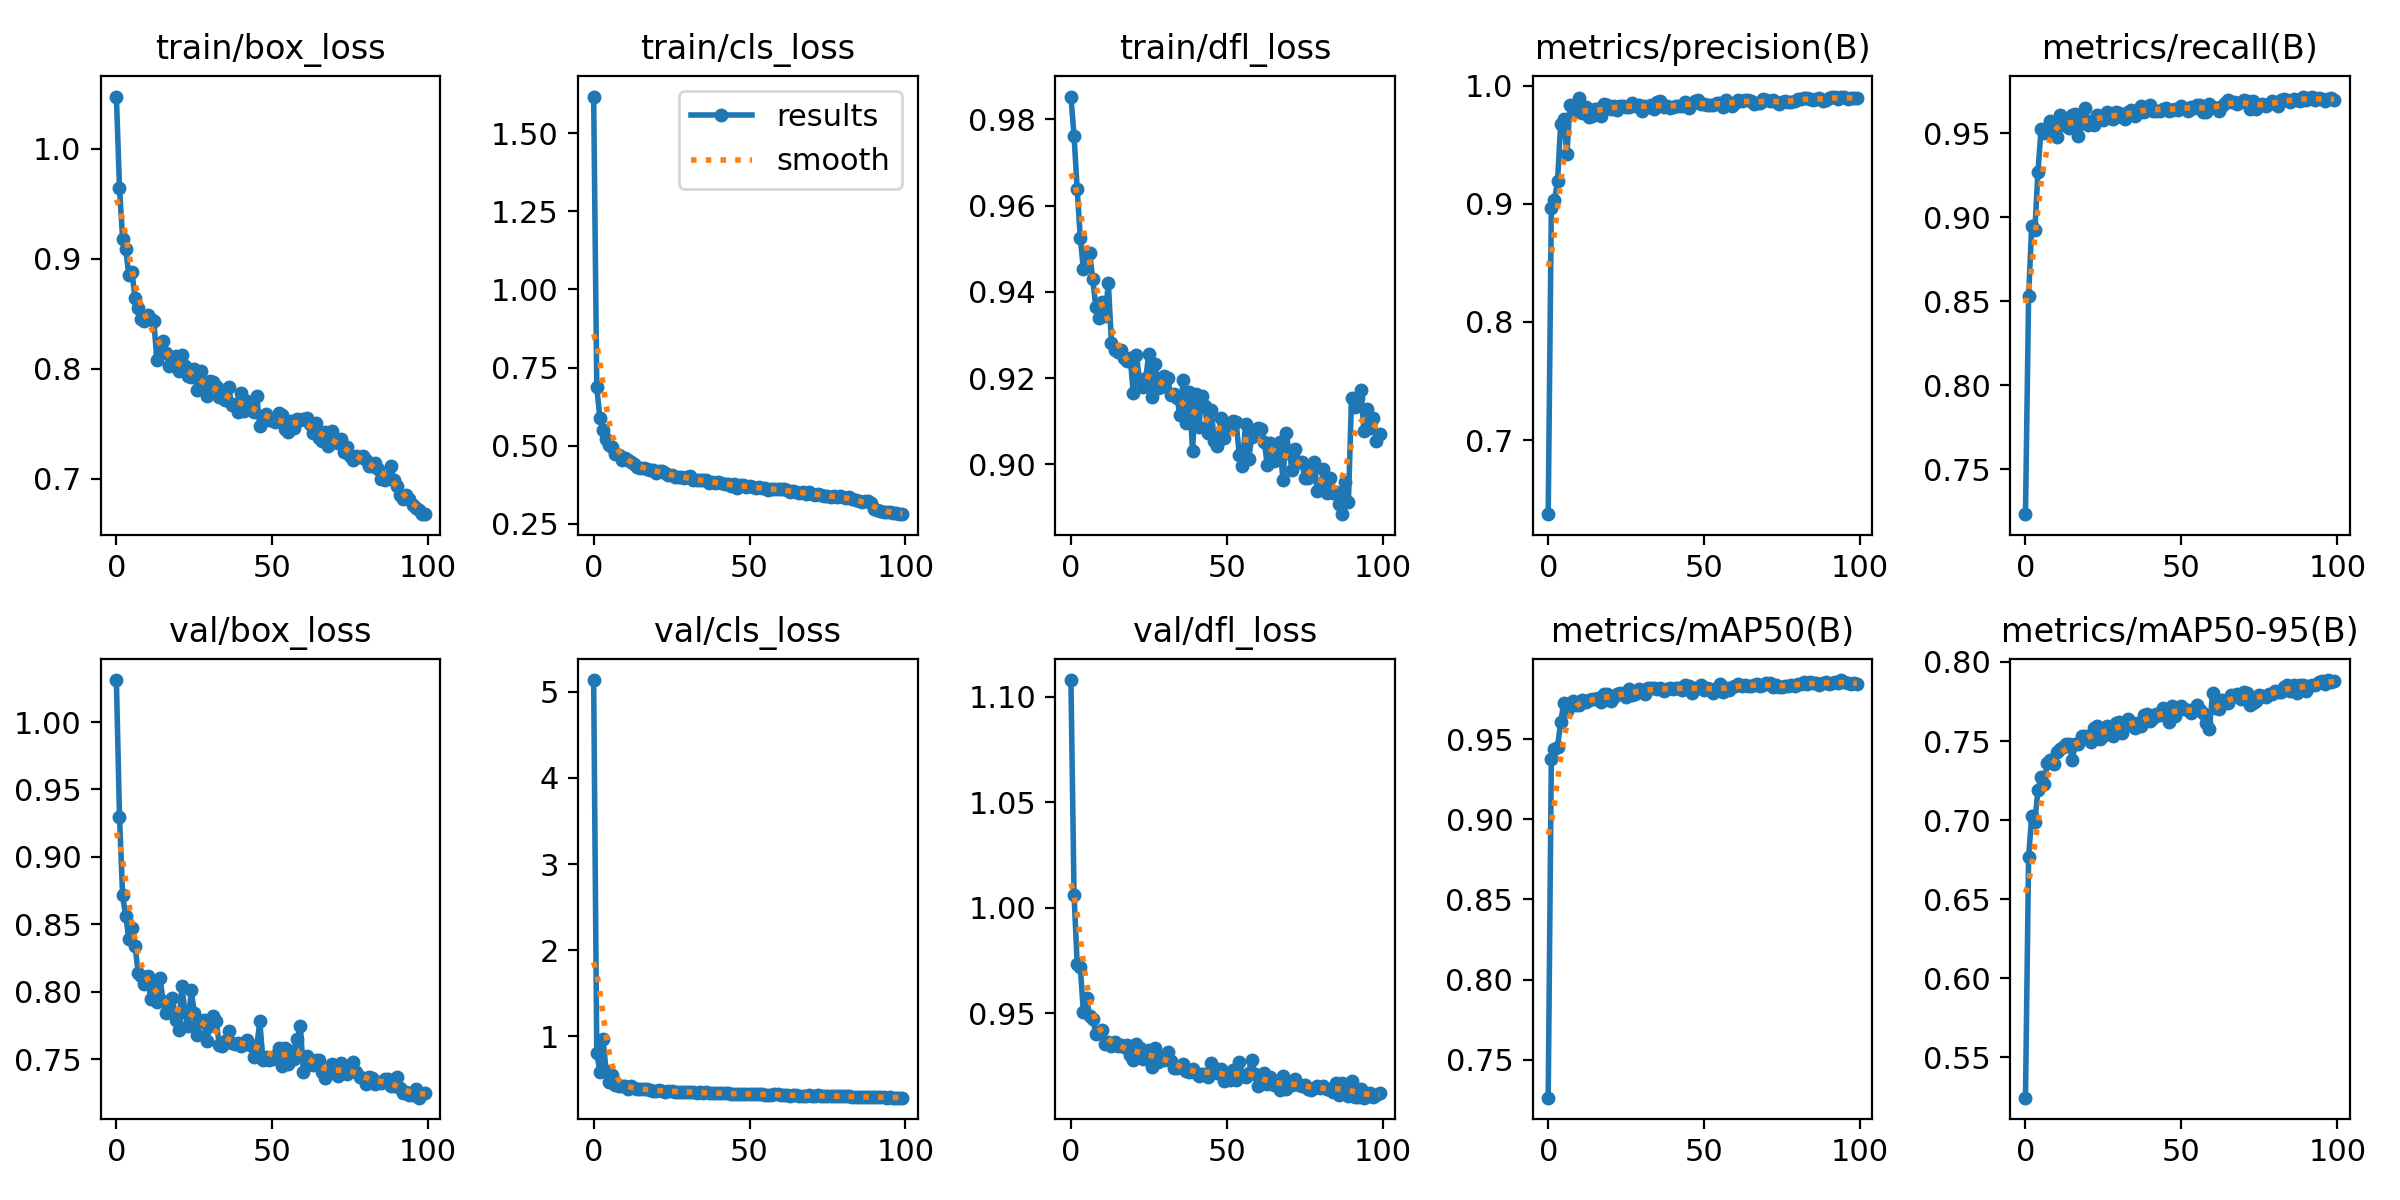

In [ ]:
show_image("./dataset/100_epoch_results.png")

# Model evaluation (best epoch)
- 이 과정에서는 앞서 불러온 최적의 모델 가중치를 사용하여 검증 데이터셋과 테스트 데이터셋의 성능을 평가합니다.
- 이를 통해 모델의 일반화 능력과 실제 성능을 확인할 수 있습니다.

## Validation dataset evaluation

In [ ]:
val_name = "val_result"  # 검증 데이터셋 결과를 저장할 폴더 이름 설정
val_result = model.val(imgsz=640, split="val", name=val_name) # 검증 데이터셋 평가 실행

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/data/covered_images/valid_data.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:51<00:00,  1.60s/it]


                   all        500       2023      0.986      0.961      0.981      0.783
                     0        498        689      0.992      0.985      0.992       0.83
                     1        177        187      0.948      0.881      0.925      0.546
                     2        181        234      0.998      0.983      0.995      0.821
                     3        238        265      0.999      0.989       0.99      0.801
                     4         91         94      0.972      0.968      0.988      0.804
                     5         92         98          1      0.959      0.979       0.77
                     6        194        212      0.986      0.981      0.991      0.815
                     7         83         86      0.983      0.977      0.985      0.813
                     8        109        109          1      0.972      0.987      0.804
                     9         46         49      0.984      0.918       0.98      0.823
Speed: 0.6ms preproce

### 검증 데이터셋 결과를 혼동 행렬 이미지로 시각화
- 이 히트맵은 모델이 0부터 9까지의 숫자를 얼마나 잘 분류하는지를 보여줍니다.
- 각 열은 실제 라벨을, 각 행은 모델이 예측한 라벨을 나타냅니다.
- 대각선 상의 값이 높으면 높을수록 모델의 예측 정확도가 높음을 의미합니다.
- 이 히트맵에서는 모든 클래스(0~9)가 90% 이상의 높은 정확도로 잘 예측되었음을 확인할 수 있습니다.
- 이는 모델이 각 클래스를 정확하게 분류하는 데 효과적임을 나타냅니다.

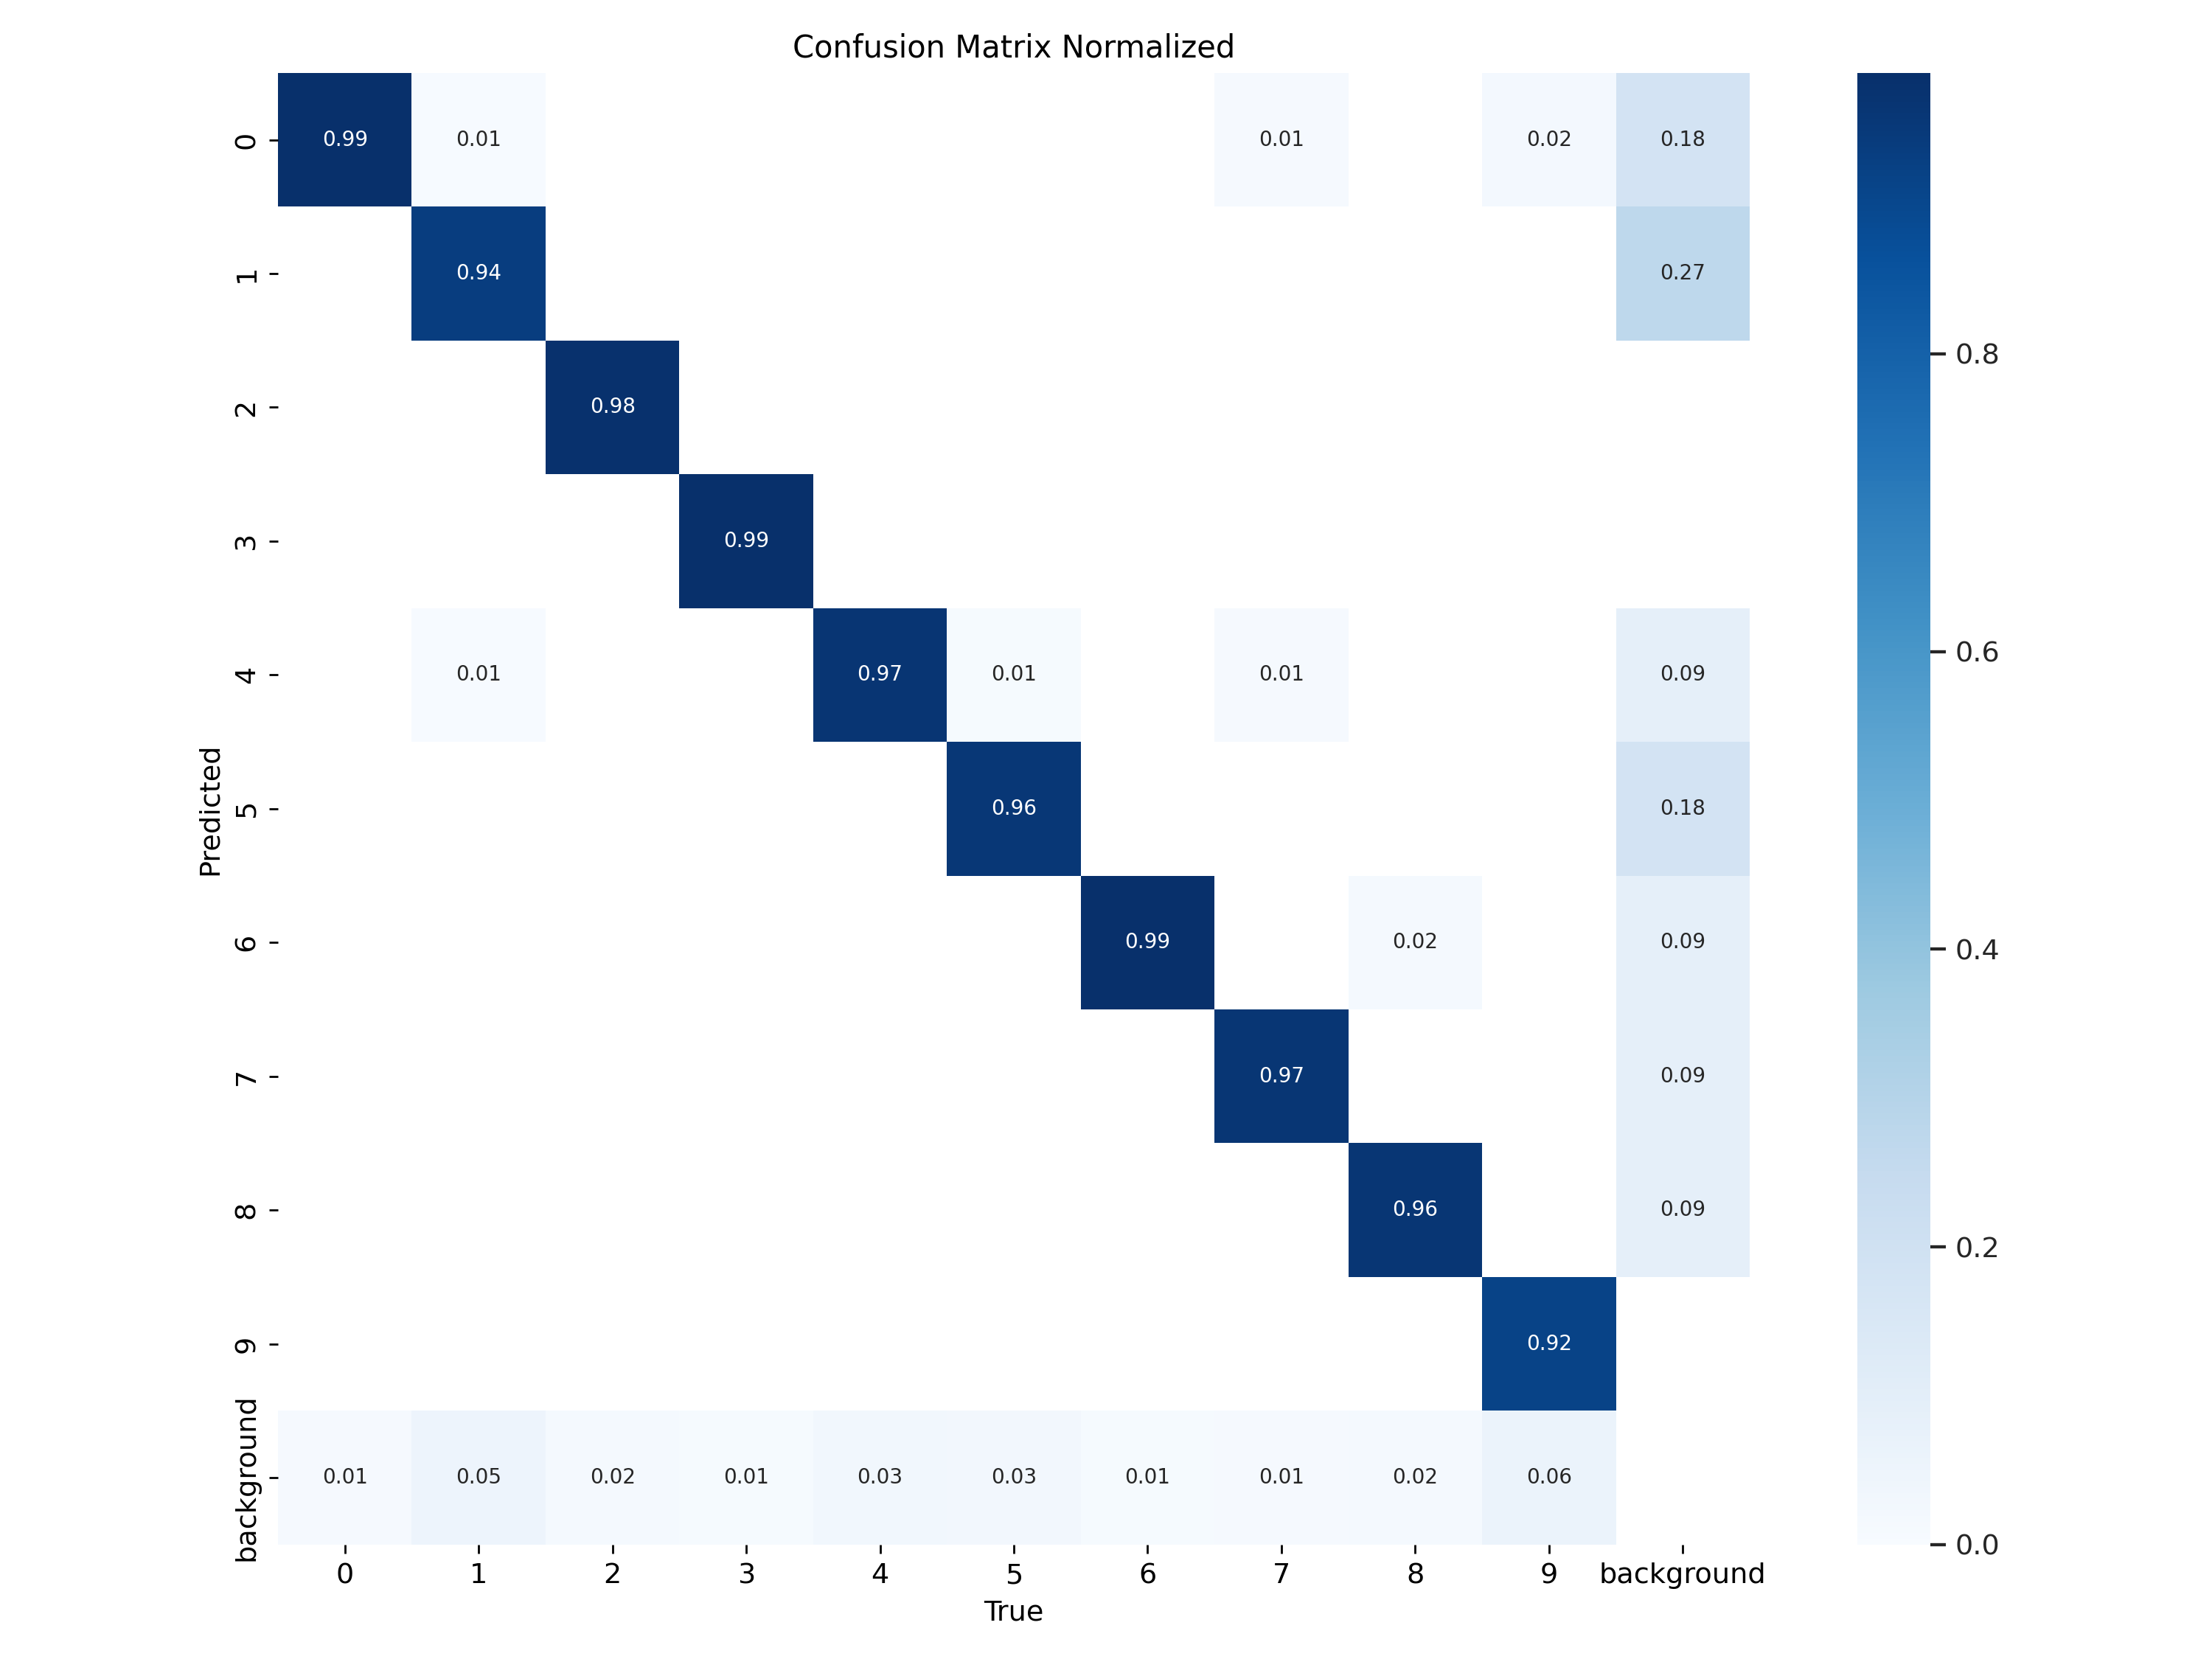

In [ ]:
show_image(f"runs/detect/val_result/confusion_matrix_normalized.png", width=800, height=800)

## Test dataset evaluation

In [ ]:
test_name = "test_result" # 테스트 결과를 저장할 폴더 이름 설정
test_result = model.val(imgsz=640, split="test", name=test_name) # 테스트 데이터셋 평가 실행

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/data/covered_images/test_data... 390 images, 0 backgrounds, 0 corrupt: 100%|██████████| 390/390 [00:00<00:00, 403.12it/s]

val: New cache created: /content/dataset/data/covered_images/test_data.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:42<00:00,  1.70s/it]


                   all        390       1569       0.99      0.964      0.983      0.783
                     0        388        530      0.996      0.982      0.994      0.824
                     1        127        139      0.976      0.885      0.953      0.582
                     2        144        188      0.994       0.96      0.979       0.78
                     3        190        200          1      0.979      0.988      0.811
                     4         79         81      0.989      0.988      0.995      0.815
                     5        103        106      0.995      0.934      0.969      0.762
                     6        142        153      0.993      0.976       0.99      0.819
                     7         56         56      0.999      0.982      0.995      0.785
                     8         84         84      0.979      0.988      0.995      0.847
                     9         31         32      0.976      0.969      0.971      0.802
Speed: 0.3ms preproce

### 테스트 데이터셋 결과를 혼동 행렬 이미지로 시각화
- 테스트 데이터셋의 히트맵 또한 모든 클래스(0~9)가 90% 이상의 높은 정확도로 잘 예측되었음을 확인할 수 있습니다.

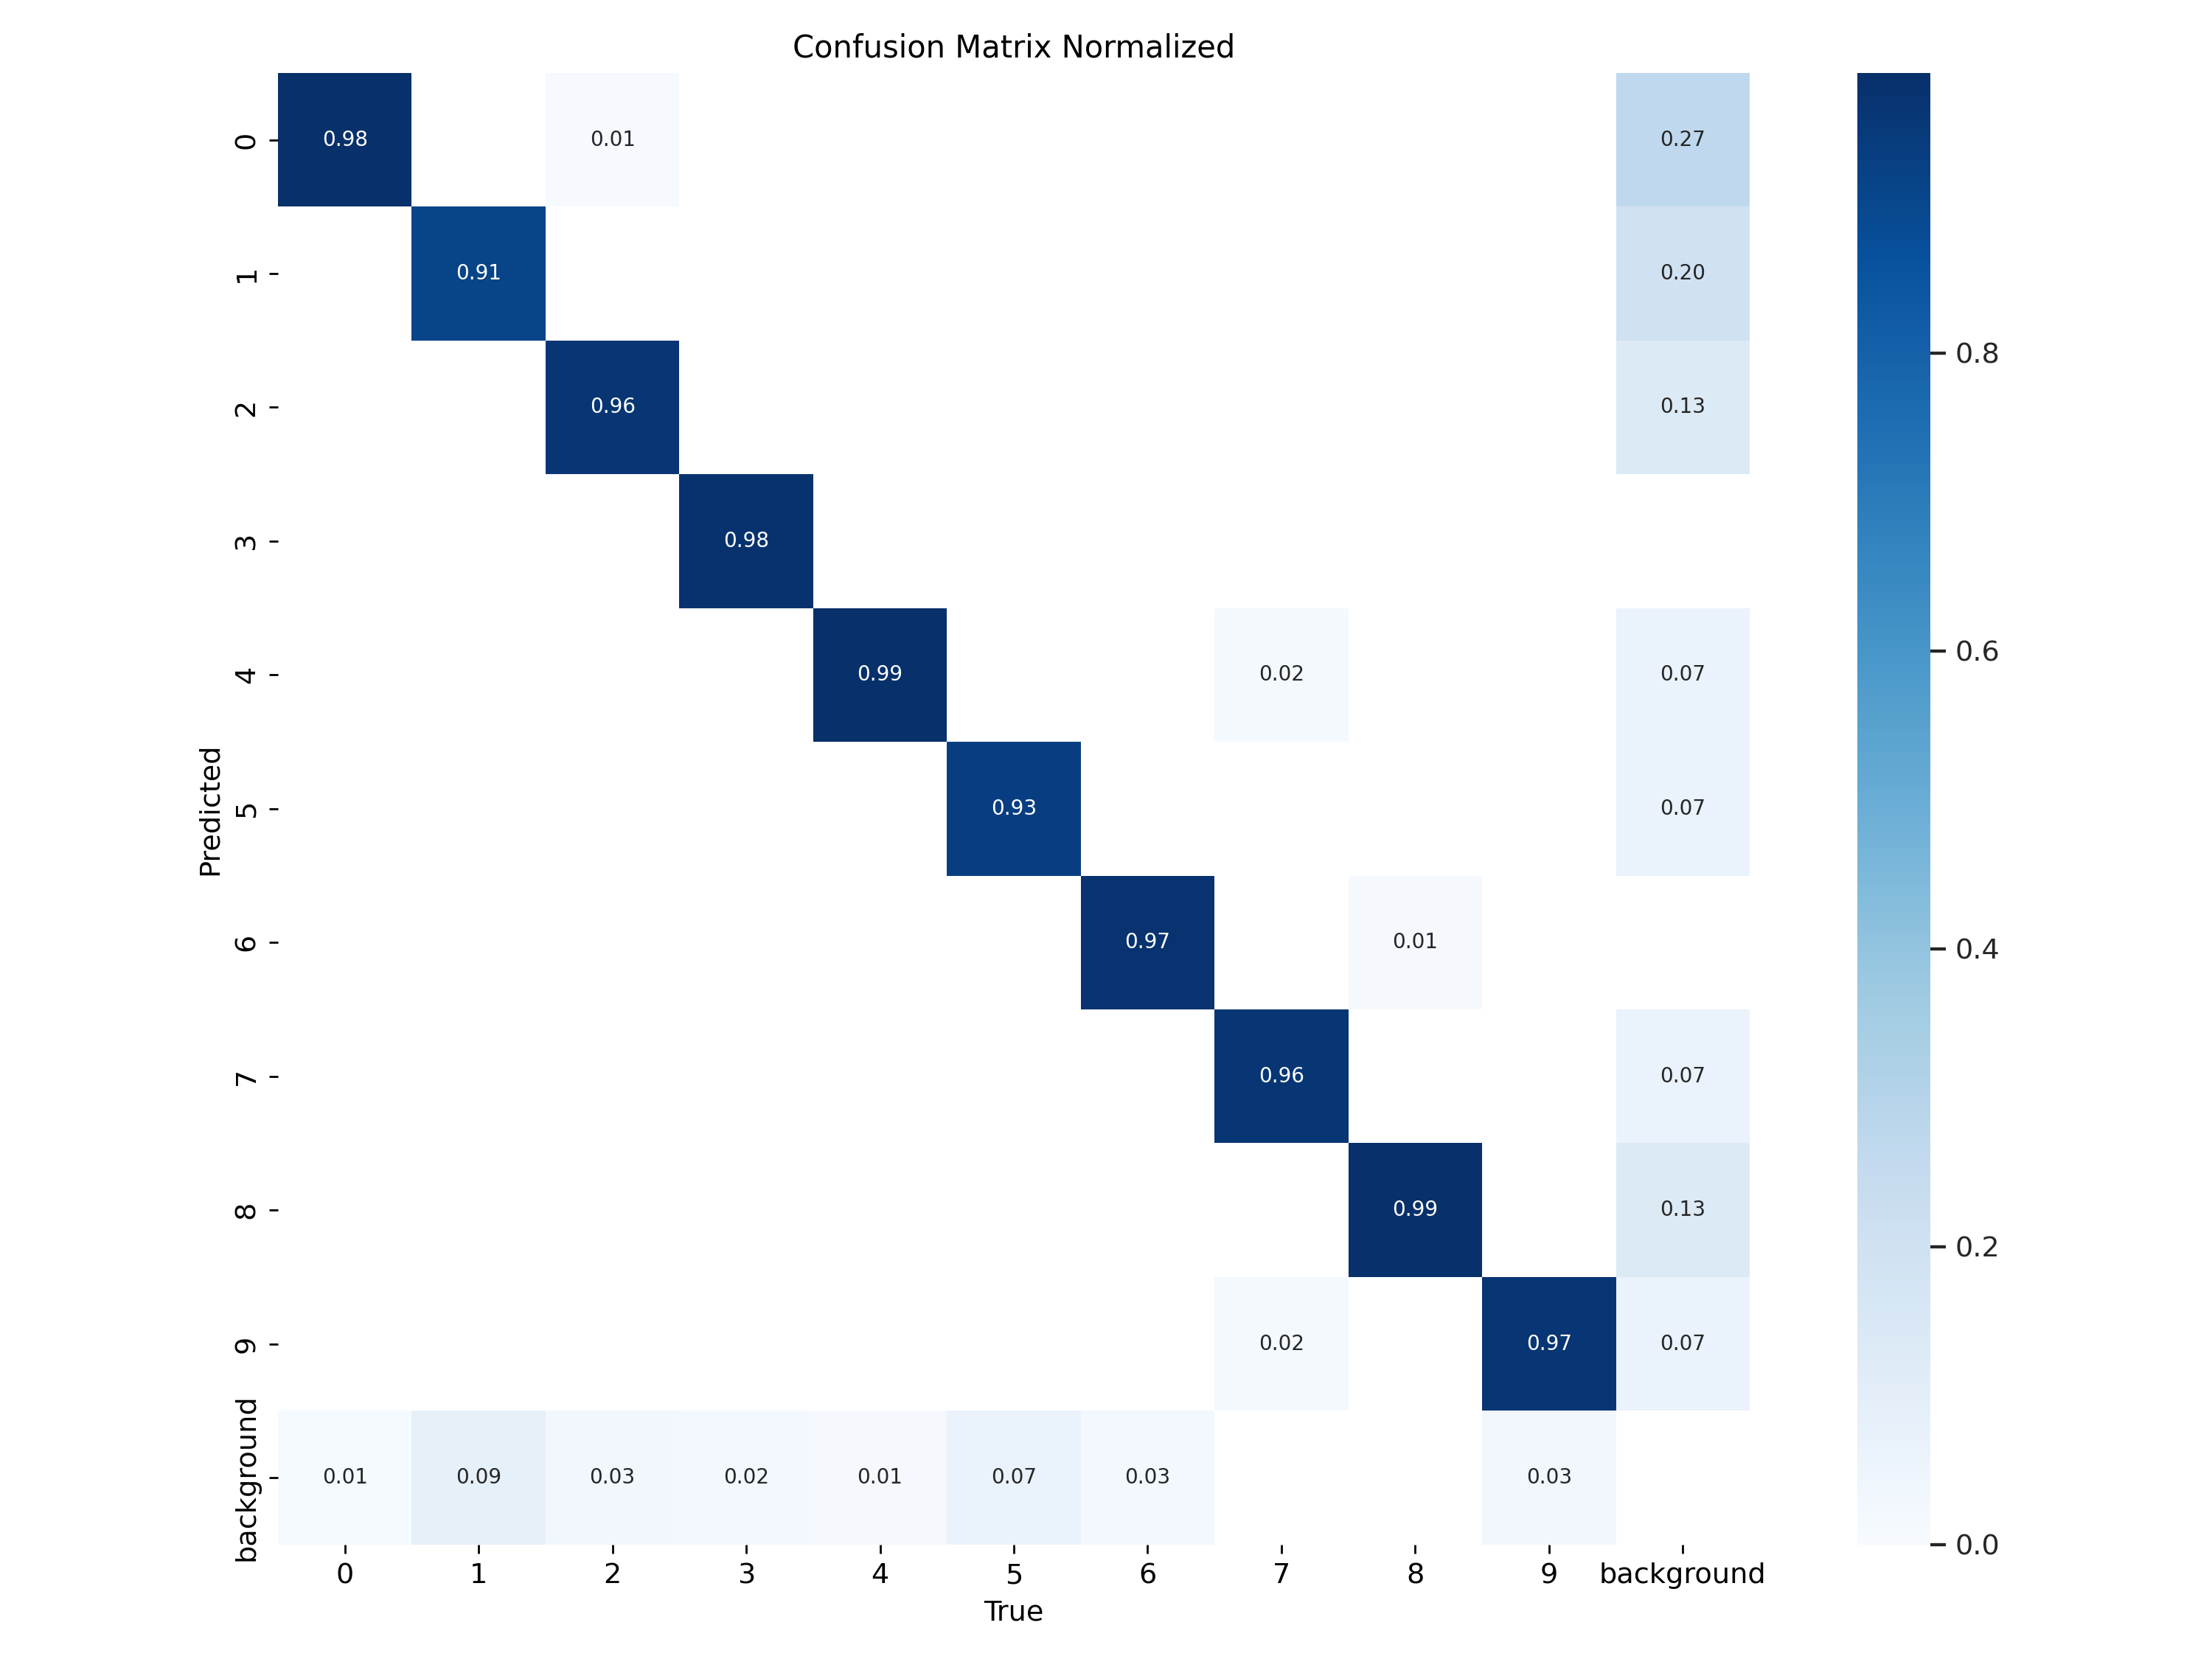

In [ ]:
# 테스트 데이터셋 결과를 혼동 행렬 이미지로 시각화
show_image(f"runs/detect/test_result/confusion_matrix_normalized.png", width=800, height=800)

# Inference with Masked Test dataset(작은 화면이 가려진 Test 데이터에 대한 추론)

In [ ]:
test_inference_name = "test_predict"
image_paths = glob.glob('./dataset/data/covered_images/test_data/*jpg')
# 설정한 배치 크기
batch_size = 4

# 이미지 경로를 배치 크기에 맞춰 분할
test_inference_results = []
for i in tqdm(range(0, len(image_paths), batch_size)):
    batch_paths = image_paths[i:i + batch_size]
    results = model.predict(
        project=project, # 추론 결과를 저장할 프로젝트 디렉토리 지정
        source=batch_paths, # 추론을 수행할 이미지의 경로 지정
        name=test_inference_name, # 프로젝트 디렉토리 내에 추론결과를 저장할 폴더명 지정
        device='cuda', # gpu 설정
        imgsz=640, # 입력 이미지 크기를 640x640으로 지정
        conf=0.5, # 모델이 예측에 대해 확신할 임계값을 0.5로 지정(모델이 예측한 확률이 0.5 이상일 때만 해당 레이블로 간주)
        save=True, # 추론 결과를 저장할지 여부
        save_txt=True, # 추론 결과가 담긴 txt파일을 저장할지 여부
        save_conf=True, # 모델의 확신도를 저장할지 여부
        show_conf=True, # 추론한 이미지에 확신도를 나타낼지 여부
        exist_ok=True) # 결과를 저장할 경로가 이미 존재하면 대체할지 여부

    # 결과에서 원본 이미지 삭제하여 메모리 절약
    for item in results:
        del item.orig_img
    test_inference_results.append(results)
# 배치사이즈 만큼 묶여 있는 리스트를 풀어줌
test_inference_results = sum(test_inference_results,[])

  0%|          | 0/98 [00:00<?, ?it/s]


0: 640x480 2 0s, 1 1, 1 3, 11.0ms
1: 640x480 2 0s, 1 3, 1 4, 11.0ms
2: 640x480 2 0s, 1 3, 1 5, 11.0ms
3: 640x480 1 0, 1 2, 1 6, 1 7, 11.0ms
Speed: 14.3ms preprocess, 11.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  1%|          | 1/98 [00:05<08:20,  5.16s/it]


0: 640x480 1 0, 2 2s, 1 5, 12.4ms
1: 640x480 2 0s, 1 2, 1 6, 12.4ms
2: 640x480 1 0, 1 1, 1 3, 1 8, 12.4ms
3: 640x480 2 0s, 1 4, 1 5, 12.4ms
Speed: 14.3ms preprocess, 12.4ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  2%|▏         | 2/98 [00:09<07:16,  4.54s/it]


0: 640x480 2 0s, 1 3, 1 4, 4.0ms
1: 640x480 1 0, 1 5, 2 6s, 4.0ms
2: 640x480 1 0, 1 1, 1 3, 1 9, 4.0ms
3: 640x480 1 0, 2 3s, 1 8, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  3%|▎         | 3/98 [00:10<04:50,  3.05s/it]


0: 640x640 2 0s, 1 1, 1 7, 5.4ms
1: 640x640 1 0, 1 1, 1 3, 1 8, 5.4ms
2: 640x640 1 0, 2 2s, 1 4, 5.4ms
3: 640x640 1 0, 1 3, 1 4, 1 8, 5.4ms
Speed: 2.9ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  4%|▍         | 4/98 [00:11<03:24,  2.17s/it]


0: 640x480 1 0, 1 2, 1 3, 1 7, 4.1ms
1: 640x480 1 0, 1 1, 1 3, 1 8, 4.1ms
2: 640x480 2 0s, 1 3, 1 6, 4.1ms
3: 640x480 2 0s, 1 2, 1 6, 4.1ms
Speed: 2.9ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  5%|▌         | 5/98 [00:12<02:51,  1.84s/it]


0: 640x480 1 0, 1 3, 1 4, 1 6, 4.0ms
1: 640x480 1 0, 1 3, 1 6, 1 8, 4.0ms
2: 640x480 1 0, 2 3s, 1 8, 4.0ms
3: 640x480 1 0, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  6%|▌         | 6/98 [00:13<02:25,  1.58s/it]


0: 640x480 (no detections), 4.0ms
1: 640x480 1 0, 2 2s, 1 6, 4.0ms
2: 640x480 1 0, 1 3, 1 5, 1 6, 4.0ms
3: 640x480 2 0s, 1 2, 1 6, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  7%|▋         | 7/98 [00:14<02:06,  1.39s/it]


0: 640x480 1 0, 2 1s, 1 9, 4.0ms
1: 640x480 2 0s, 1 1, 1 9, 4.0ms
2: 640x480 1 0, 1 2, 1 3, 1 5, 4.0ms
3: 640x480 1 0, 2 1s, 1 9, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  8%|▊         | 8/98 [00:15<01:52,  1.25s/it]


0: 640x480 2 0s, 1 2, 1 5, 4.0ms
1: 640x480 2 0s, 1 3, 1 8, 4.0ms
2: 640x480 1 0, 1 1, 1 3, 1 9, 4.0ms
3: 640x480 2 0s, 1 1, 1 6, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


  9%|▉         | 9/98 [00:16<01:43,  1.17s/it]


0: 640x640 1 0, 1 2, 1 3, 1 5, 5.8ms
1: 640x640 2 0s, 1 4, 1 5, 5.8ms
2: 640x640 1 0, 1 1, 1 2, 1 7, 5.8ms
3: 640x640 1 0, 1 1, 1 2, 1 6, 5.8ms
Speed: 3.0ms preprocess, 5.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 10%|█         | 10/98 [00:17<01:32,  1.06s/it]


0: 640x480 2 0s, 1 1, 1 3, 4.1ms
1: 640x480 2 0s, 1 3, 1 6, 4.1ms
2: 640x480 1 0, 1 2, 1 4, 1 5, 4.1ms
3: 640x480 2 0s, 1 1, 1 2, 4.1ms
Speed: 2.8ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 11%|█         | 11/98 [00:18<01:30,  1.04s/it]


0: 640x480 1 0, 1 3, 1 6, 1 7, 4.0ms
1: 640x480 1 0, 1 2, 1 3, 1 8, 4.0ms
2: 640x480 1 0, 1 3, 1 4, 1 8, 4.0ms
3: 640x480 1 0, 1 5, 2 6s, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 12%|█▏        | 12/98 [00:19<01:33,  1.08s/it]


0: 640x480 2 0s, 1 3, 1 8, 4.0ms
1: 640x480 1 0, 1 3, 1 5, 1 8, 4.0ms
2: 640x480 2 0s, 1 3, 1 8, 4.0ms
3: 640x480 2 0s, 1 3, 1 6, 4.0ms
Speed: 3.8ms preprocess, 4.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 13%|█▎        | 13/98 [00:21<01:40,  1.18s/it]


0: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
1: 640x480 1 0, 1 1, 2 2s, 4.0ms
2: 640x480 1 0, 2 2s, 1 5, 4.0ms
3: 640x480 1 0, 2 2s, 1 3, 4.0ms
Speed: 3.5ms preprocess, 4.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 14%|█▍        | 14/98 [00:22<01:50,  1.31s/it]


0: 640x640 1 0, 1 2, 1 4, 1 5, 5.5ms
1: 640x640 1 0, 1 3, 1 4, 1 9, 5.5ms
2: 640x640 1 0, 1 1, 1 3, 1 6, 5.5ms
3: 640x640 2 0s, 1 1, 1 6, 5.5ms
Speed: 4.1ms preprocess, 5.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 15%|█▌        | 15/98 [00:23<01:49,  1.32s/it]


0: 640x480 1 0, 1 2, 1 5, 1 6, 4.2ms
1: 640x480 2 0s, 1 3, 1 5, 4.2ms
2: 640x480 1 0, 1 1, 1 6, 1 7, 4.2ms
3: 640x480 1 0, 1 3, 1 8, 4.2ms
Speed: 3.8ms preprocess, 4.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 16%|█▋        | 16/98 [00:25<01:56,  1.42s/it]


0: 640x480 1 0, 1 1, 1 3, 1 7, 4.0ms
1: 640x480 2 0s, 1 4, 1 5, 4.0ms
2: 640x480 1 0, 1 2, 1 7, 1 9, 4.0ms
3: 640x480 1 0, 1 2, 2 6s, 4.0ms
Speed: 3.7ms preprocess, 4.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 17%|█▋        | 17/98 [00:27<02:02,  1.51s/it]


0: 640x480 2 0s, 1 3, 1 8, 4.9ms
1: 640x480 1 0, 4.9ms
2: 640x480 1 0, 3 2s, 4.9ms
3: 640x480 1 0, 1 3, 1 4, 1 6, 4.9ms
Speed: 4.1ms preprocess, 4.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 18%|█▊        | 18/98 [00:28<02:01,  1.52s/it]


0: 640x480 2 0s, 1 2, 1 3, 4.0ms
1: 640x480 2 0s, 1 2, 1 6, 4.0ms
2: 640x480 2 0s, 1 3, 1 8, 4.0ms
3: 640x480 2 0s, 1 2, 1 3, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 19%|█▉        | 19/98 [00:29<01:48,  1.38s/it]


0: 640x480 1 0, 1 1, 1 2, 1 9, 4.0ms
1: 640x480 2 0s, 1 2, 1 5, 4.0ms
2: 640x480 1 0, 1 1, 1 2, 1 9, 4.0ms
3: 640x480 1 0, 1 3, 1 4, 1 6, 4.0ms
Speed: 2.9ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 20%|██        | 20/98 [00:31<01:41,  1.30s/it]


0: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
1: 640x480 1 0, 1 1, 1 5, 1 7, 4.0ms
2: 640x480 1 0, 1 3, 1 5, 1 8, 4.0ms
3: 640x480 2 0s, 1 2, 1 6, 4.0ms
Speed: 2.9ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 21%|██▏       | 21/98 [00:32<01:35,  1.24s/it]


0: 640x480 1 0, 1 2, 1 4, 1 6, 4.0ms
1: 640x480 1 0, 2 3s, 1 4, 4.0ms
2: 640x480 1 0, 1 3, 1 4, 1 8, 4.0ms
3: 640x480 1 0, 1 2, 1 4, 1 6, 4.0ms
Speed: 3.1ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 22%|██▏       | 22/98 [00:33<01:29,  1.17s/it]


0: 640x640 3 0s, 1 1, 1 7, 5.4ms
1: 640x640 (no detections), 5.4ms
2: 640x640 1 0, 1 2, 1 3, 1 6, 5.4ms
3: 640x640 1 0, 1 1, 1 3, 1 8, 5.4ms
Speed: 3.0ms preprocess, 5.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 23%|██▎       | 23/98 [00:34<01:20,  1.08s/it]


0: 640x480 1 0, 1 1, 1 5, 1 6, 4.2ms
1: 640x480 2 0s, 1 4, 1 5, 4.2ms
2: 640x480 2 0s, 1 3, 1 7, 4.2ms
3: 640x480 1 0, 1 1, 1 5, 1 6, 4.2ms
Speed: 2.9ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 24%|██▍       | 24/98 [00:35<01:19,  1.08s/it]


0: 640x480 3 0s, 1 1, 1 7, 4.0ms
1: 640x480 1 0, 3 2s, 4.0ms
2: 640x480 2 0s, 1 6, 1 7, 4.0ms
3: 640x480 1 0, 1 1, 2 2s, 4.0ms
Speed: 3.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 26%|██▌       | 25/98 [00:36<01:17,  1.07s/it]


0: 640x640 2 0s, 1 3, 1 7, 5.4ms
1: 640x640 2 0s, 1 1, 1 7, 5.4ms
2: 640x640 3 0s, 1 1, 1 7, 5.4ms
3: 640x640 1 0, 1 2, 1 7, 5.4ms
Speed: 2.9ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 27%|██▋       | 26/98 [00:36<01:09,  1.04it/s]


0: 640x480 1 0, 1 1, 2 2s, 4.1ms
1: 640x480 1 0, 1 3, 1 4, 1 6, 4.1ms
2: 640x480 2 0s, 1 5, 1 6, 4.1ms
3: 640x480 2 0s, 1 2, 4.1ms
Speed: 2.8ms preprocess, 4.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 28%|██▊       | 27/98 [00:37<01:09,  1.02it/s]


0: 640x480 1 0, 1 1, 1 3, 1 6, 4.0ms
1: 640x480 3 0s, 1 2, 4.0ms
2: 640x480 2 0s, 1 3, 1 8, 4.0ms
3: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
Speed: 3.8ms preprocess, 4.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 29%|██▊       | 28/98 [00:39<01:15,  1.08s/it]


0: 640x480 1 0, 1 3, 1 6, 1 8, 4.0ms
1: 640x480 1 0, 1 2, 2 6s, 4.0ms
2: 640x480 1 0, 1 1, 1 5, 1 6, 4.0ms
3: 640x480 1 0, 1 2, 1 3, 1 8, 4.0ms
Speed: 4.2ms preprocess, 4.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 30%|██▉       | 29/98 [00:40<01:25,  1.24s/it]


0: 640x480 1 0, 1 3, 1 5, 1 8, 4.0ms
1: 640x480 1 0, 1 3, 1 7, 1 8, 4.0ms
2: 640x480 1 0, 1 2, 1 3, 1 5, 4.0ms
3: 640x480 1 0, 1 5, 1 7, 1 9, 4.0ms
Speed: 4.5ms preprocess, 4.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 31%|███       | 30/98 [00:42<01:32,  1.36s/it]


0: 640x640 1 0, 1 1, 1 4, 1 7, 5.5ms
1: 640x640 1 0, 1 1, 1 3, 1 8, 5.5ms
2: 640x640 2 0s, 1 3, 1 8, 5.5ms
3: 640x640 2 0s, 1 1, 1 7, 5.5ms
Speed: 4.1ms preprocess, 5.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 32%|███▏      | 31/98 [00:43<01:31,  1.36s/it]


0: 640x480 1 0, 1 1, 1 3, 1 6, 6.0ms
1: 640x480 1 0, 1 1, 1 3, 1 9, 6.0ms
2: 640x480 1 0, 1 2, 2 5s, 6.0ms
3: 640x480 1 0, 1 3, 1 4, 1 8, 6.0ms
Speed: 9.2ms preprocess, 6.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 33%|███▎      | 32/98 [00:45<01:36,  1.47s/it]


0: 640x480 1 0, 1 1, 1 3, 1 4, 4.0ms
1: 640x480 2 0s, 1 3, 1 8, 4.0ms
2: 640x480 1 0, 1 1, 1 5, 1 6, 4.0ms
3: 640x480 1 0, 3 2s, 4.0ms
Speed: 3.6ms preprocess, 4.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 34%|███▎      | 33/98 [00:47<01:38,  1.52s/it]


0: 640x480 1 0, 2 2s, 1 6, 4.0ms
1: 640x480 2 0s, 1 3, 1 6, 4.0ms
2: 640x480 2 0s, 1 3, 1 6, 4.0ms
3: 640x480 2 0s, 1 3, 1 8, 4.0ms
Speed: 3.7ms preprocess, 4.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 35%|███▍      | 34/98 [00:48<01:33,  1.46s/it]


0: 640x480 1 0, 1 2, 1 6, 1 9, 4.0ms
1: 640x480 1 0, 1 1, 1 2, 1 3, 4.0ms
2: 640x480 1 0, 1 4, 1 6, 1 9, 4.0ms
3: 640x480 1 0, 1 2, 1 3, 1 6, 4.0ms
Speed: 2.6ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 36%|███▌      | 35/98 [00:49<01:23,  1.32s/it]


0: 640x640 2 0s, 1 7, 5.4ms
1: 640x640 2 0s, 2 2s, 5.4ms
2: 640x640 1 0, 1 3, 1 5, 1 6, 5.4ms
3: 640x640 1 0, 1 2, 1 3, 1 7, 5.4ms
Speed: 3.2ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 37%|███▋      | 36/98 [00:50<01:13,  1.19s/it]


0: 640x480 1 0, 1 2, 1 3, 1 8, 4.1ms
1: 640x480 2 0s, 1 3, 1 8, 4.1ms
2: 640x480 1 0, 2 1s, 1 9, 4.1ms
3: 640x480 2 0s, 2 2s, 4.1ms
Speed: 2.6ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 38%|███▊      | 37/98 [00:51<01:09,  1.14s/it]


0: 640x480 1 0, 1 2, 1 5, 1 6, 4.0ms
1: 640x480 2 0s, 1 3, 1 6, 4.0ms
2: 640x480 2 0s, 1 1, 1 2, 4.0ms
3: 640x480 1 0, 1 3, 1 4, 1 6, 4.0ms
Speed: 3.4ms preprocess, 4.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 39%|███▉      | 38/98 [00:52<01:06,  1.10s/it]


0: 640x480 2 0s, 1 3, 1 8, 4.0ms
1: 640x480 1 0, 1 1, 1 3, 1 6, 4.0ms
2: 640x480 1 0, 2 1s, 1 2, 1 7, 4.0ms
3: 640x480 2 0s, 2 6s, 4.0ms
Speed: 2.9ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 40%|███▉      | 39/98 [00:53<01:03,  1.07s/it]


0: 640x480 2 0s, 1 3, 1 4, 4.0ms
1: 640x480 1 0, 1 2, 1 4, 1 6, 4.0ms
2: 640x480 1 0, 1 1, 1 3, 1 6, 4.0ms
3: 640x480 2 0s, 1 7, 4.0ms
Speed: 3.1ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 41%|████      | 40/98 [00:54<01:01,  1.06s/it]


0: 640x640 1 0, 1 2, 1 3, 1 8, 5.4ms
1: 640x640 3 0s, 1 2, 5.4ms
2: 640x640 1 0, 1 2, 1 5, 1 6, 5.4ms
3: 640x640 2 0s, 1 3, 1 5, 5.4ms
Speed: 2.9ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 42%|████▏     | 41/98 [00:55<00:56,  1.01it/s]


0: 640x480 2 0s, 1 2, 1 4, 4.8ms
1: 640x480 1 0, 1 2, 1 3, 1 5, 4.8ms
2: 640x480 2 0s, 2 2s, 4.8ms
3: 640x480 1 0, 1 2, 1 3, 1 6, 4.8ms
Speed: 2.8ms preprocess, 4.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 43%|████▎     | 42/98 [00:56<00:55,  1.00it/s]


0: 640x480 1 0, 1 2, 1 5, 1 6, 4.0ms
1: 640x480 1 0, 1 3, 1 5, 1 8, 4.0ms
2: 640x480 1 0, 1 2, 2 6s, 4.0ms
3: 640x480 1 0, 1 2, 1 3, 1 8, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 44%|████▍     | 43/98 [00:57<00:54,  1.00it/s]


0: 640x640 1 0, 1 1, 1 3, 1 9, 5.5ms
1: 640x640 2 0s, 2 2s, 5.5ms
2: 640x640 2 0s, 1 1, 1 9, 5.5ms
3: 640x640 2 0s, 1 1, 1 5, 5.5ms
Speed: 4.0ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 45%|████▍     | 44/98 [00:58<00:56,  1.04s/it]


0: 640x480 1 0, 1 2, 1 7, 1 9, 4.3ms
1: 640x480 2 0s, 1 3, 1 8, 4.3ms
2: 640x480 2 0s, 1 5, 1 6, 4.3ms
3: 640x480 1 0, 1 1, 1 3, 1 6, 4.3ms
Speed: 4.1ms preprocess, 4.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 46%|████▌     | 45/98 [01:00<01:04,  1.22s/it]


0: 640x480 1 0, 4.0ms
1: 640x480 2 0s, 1 2, 1 6, 4.0ms
2: 640x480 1 0, 1 1, 1 4, 1 5, 4.0ms
3: 640x480 1 0, 1 2, 1 3, 1 4, 4.0ms
Speed: 3.7ms preprocess, 4.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 47%|████▋     | 46/98 [01:01<01:10,  1.35s/it]


0: 640x480 1 0, 2 2s, 1 6, 4.0ms
1: 640x480 1 0, 2 2s, 1 5, 4.0ms
2: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
3: 640x480 1 0, 1 2, 1 6, 4.0ms
Speed: 3.7ms preprocess, 4.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 48%|████▊     | 47/98 [01:03<01:12,  1.42s/it]


0: 640x480 1 0, 1 2, 1 6, 6.4ms
1: 640x480 3 0s, 1 7, 6.4ms
2: 640x480 2 0s, 1 3, 1 4, 6.4ms
3: 640x480 1 0, 2 1s, 1 5, 6.4ms
Speed: 6.4ms preprocess, 6.4ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 49%|████▉     | 48/98 [01:05<01:15,  1.51s/it]


0: 640x480 2 0s, 1 6, 1 7, 4.2ms
1: 640x480 1 0, 3 1s, 1 7, 4.2ms
2: 640x480 1 0, 1 3, 1 6, 1 8, 4.2ms
3: 640x480 2 0s, 1 3, 1 8, 4.2ms
Speed: 4.9ms preprocess, 4.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 50%|█████     | 49/98 [01:06<01:15,  1.55s/it]


0: 640x480 1 0, 1 1, 1 7, 4.4ms
1: 640x480 1 0, 1 3, 1 5, 1 6, 4.4ms
2: 640x480 1 0, 1 4, 1 5, 1 6, 4.4ms
3: 640x480 2 0s, 1 4, 1 5, 4.4ms
Speed: 3.7ms preprocess, 4.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 51%|█████     | 50/98 [01:08<01:11,  1.48s/it]


0: 640x480 3 0s, 1 6, 4.0ms
1: 640x480 1 0, 1 3, 1 5, 4.0ms
2: 640x480 1 0, 1 3, 1 4, 1 8, 4.0ms
3: 640x480 2 0s, 2 1s, 1 7, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 52%|█████▏    | 51/98 [01:08<01:02,  1.33s/it]


0: 640x480 2 0s, 1 2, 1 5, 4.0ms
1: 640x480 1 0, 1 1, 1 2, 1 6, 4.0ms
2: 640x480 1 0, 1 4, 1 5, 1 6, 4.0ms
3: 640x480 1 0, 1 2, 1 4, 1 6, 4.0ms
Speed: 2.6ms preprocess, 4.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 53%|█████▎    | 52/98 [01:10<00:56,  1.24s/it]


0: 640x480 1 0, 2 2s, 1 3, 4.0ms
1: 640x480 2 0s, 1 1, 1 2, 4.0ms
2: 640x480 1 0, 1 3, 1 5, 1 8, 4.0ms
3: 640x480 2 0s, 1 2, 1 7, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 54%|█████▍    | 53/98 [01:11<00:53,  1.18s/it]


0: 640x480 1 0, 1 2, 1 3, 1 8, 4.0ms
1: 640x480 1 0, 1 1, 1 4, 1 7, 4.0ms
2: 640x480 1 0, 1 6, 4.0ms
3: 640x480 2 0s, 1 3, 1 6, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 55%|█████▌    | 54/98 [01:12<00:49,  1.13s/it]


0: 640x480 1 0, 3 2s, 4.0ms
1: 640x480 1 0, 1 5, 2 9s, 4.0ms
2: 640x480 1 0, 1 3, 1 5, 1 8, 4.0ms
3: 640x480 1 0, 2 2s, 1 5, 4.0ms
Speed: 2.9ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 56%|█████▌    | 55/98 [01:13<00:46,  1.08s/it]


0: 640x480 2 0s, 1 2, 1 6, 4.0ms
1: 640x480 2 0s, 1 2, 1 6, 4.0ms
2: 640x480 1 0, 1 3, 2 4s, 4.0ms
3: 640x480 1 0, 1 1, 1 3, 1 5, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 57%|█████▋    | 56/98 [01:14<00:44,  1.06s/it]


0: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
1: 640x480 2 0s, 1 3, 1 8, 4.0ms
2: 640x480 2 0s, 1 3, 1 8, 4.0ms
3: 640x480 1 0, 1 3, 1 4, 1 8, 4.0ms
Speed: 3.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 58%|█████▊    | 57/98 [01:15<00:43,  1.05s/it]


0: 640x480 1 0, 2 2s, 1 6, 4.0ms
1: 640x480 1 0, 2 2s, 1 5, 4.0ms
2: 640x480 1 0, 1 1, 1 4, 1 6, 4.0ms
3: 640x480 1 0, 1 4, 2 5s, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 59%|█████▉    | 58/98 [01:16<00:41,  1.03s/it]


0: 640x480 1 0, 1 1, 1 3, 1 6, 4.0ms
1: 640x480 1 0, 1 4, 1 7, 1 9, 4.0ms
2: 640x480 1 0, 1 3, 1 4, 1 6, 4.0ms
3: 640x480 1 0, 1 4, 1 5, 1 9, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 60%|██████    | 59/98 [01:17<00:40,  1.05s/it]


0: 640x480 1 0, 1 2, 2 6s, 4.0ms
1: 640x480 2 0s, 1 2, 1 6, 4.0ms
2: 640x480 1 0, 2 3s, 1 4, 4.0ms
3: 640x480 2 0s, 1 2, 1 5, 4.0ms
Speed: 4.3ms preprocess, 4.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 61%|██████    | 60/98 [01:18<00:43,  1.13s/it]


0: 640x480 1 0, 1 1, 2 2s, 4.0ms
1: 640x480 1 0, 4.0ms
2: 640x480 2 0s, 2 3s, 4.0ms
3: 640x480 1 0, 3 6s, 4.0ms
Speed: 4.3ms preprocess, 4.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 62%|██████▏   | 61/98 [01:20<00:47,  1.28s/it]


0: 640x640 1 0, 1 1, 1 3, 1 6, 5.5ms
1: 640x640 1 0, 1 1, 1 7, 5.5ms
2: 640x640 2 0s, 1 1, 1 2, 5.5ms
3: 640x640 1 0, 2 2s, 1 7, 5.5ms
Speed: 3.8ms preprocess, 5.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 63%|██████▎   | 62/98 [01:21<00:46,  1.30s/it]


0: 640x640 1 0, 5.3ms
1: 640x640 1 0, 3 2s, 5.3ms
2: 640x640 1 0, 1 3, 1 5, 1 6, 5.3ms
3: 640x640 1 0, 1 2, 1 6, 1 8, 5.3ms
Speed: 4.0ms preprocess, 5.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 64%|██████▍   | 63/98 [01:22<00:45,  1.31s/it]


0: 640x480 2 0s, 1 1, 1 7, 4.2ms
1: 640x480 1 0, 1 3, 2 4s, 4.2ms
2: 640x480 1 0, 1 1, 1 3, 1 8, 4.2ms
3: 640x480 1 0, 1 4, 1 5, 1 6, 4.2ms
Speed: 4.1ms preprocess, 4.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 65%|██████▌   | 64/98 [01:24<00:48,  1.42s/it]


0: 640x480 1 0, 1 1, 1 2, 1 5, 4.0ms
1: 640x480 2 0s, 1 3, 1 5, 4.0ms
2: 640x480 1 0, 1 2, 1 3, 1 6, 4.0ms
3: 640x480 1 0, 1 2, 1 4, 1 6, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 66%|██████▋   | 65/98 [01:25<00:44,  1.36s/it]


0: 640x480 2 0s, 1 1, 1 2, 4.0ms
1: 640x480 1 0, 2 2s, 1 5, 4.0ms
2: 640x480 1 0, 1 2, 1 3, 1 5, 4.0ms
3: 640x480 1 0, 1 3, 1 4, 1 5, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 67%|██████▋   | 66/98 [01:26<00:39,  1.24s/it]


0: 640x480 2 0s, 1 4, 1 6, 4.0ms
1: 640x480 1 0, 1 3, 1 5, 1 6, 4.0ms
2: 640x480 1 0, 1 2, 1 3, 1 6, 4.0ms
3: 640x480 1 0, 1 3, 1 7, 1 8, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 68%|██████▊   | 67/98 [01:27<00:36,  1.18s/it]


0: 640x480 1 0, 1 3, 1 5, 1 8, 4.0ms
1: 640x480 1 0, 1 3, 1 7, 1 9, 4.0ms
2: 640x480 1 0, 1 3, 1 4, 1 8, 4.0ms
3: 640x480 1 0, 1 3, 1 6, 1 7, 4.0ms
Speed: 2.9ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 69%|██████▉   | 68/98 [01:28<00:33,  1.12s/it]


0: 640x480 2 0s, 1 3, 1 4, 4.0ms
1: 640x480 1 0, 1 1, 1 3, 1 6, 4.0ms
2: 640x480 1 0, 2 2s, 1 6, 4.0ms
3: 640x480 1 0, 2 3s, 1 8, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 70%|███████   | 69/98 [01:29<00:31,  1.08s/it]


0: 640x480 1 0, 1 4, 1 5, 1 6, 4.0ms
1: 640x480 1 0, 1 2, 1 3, 1 8, 4.0ms
2: 640x480 3 0s, 1 1, 1 7, 4.0ms
3: 640x480 1 0, 1 3, 1 5, 1 6, 4.0ms
Speed: 3.3ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 71%|███████▏  | 70/98 [01:30<00:29,  1.07s/it]


0: 640x480 1 0, 1 4, 1 5, 1 9, 4.0ms
1: 640x480 1 0, 1 1, 1 3, 1 9, 4.0ms
2: 640x480 1 0, 1 1, 1 3, 1 5, 4.0ms
3: 640x480 2 0s, 1 3, 1 5, 4.0ms
Speed: 2.9ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 72%|███████▏  | 71/98 [01:31<00:28,  1.05s/it]


0: 640x480 1 0, 1 2, 1 4, 1 7, 4.0ms
1: 640x480 1 0, 1 1, 1 4, 1 6, 4.0ms
2: 640x480 1 0, 1 2, 1 4, 1 6, 4.0ms
3: 640x480 2 0s, 1 3, 1 8, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 73%|███████▎  | 72/98 [01:32<00:26,  1.03s/it]


0: 640x480 1 0, 3 2s, 4.0ms
1: 640x480 1 0, 1 2, 1 3, 1 6, 4.0ms
2: 640x480 1 0, 1 2, 1 3, 1 6, 4.0ms
3: 640x480 1 0, 2 2s, 1 4, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 74%|███████▍  | 73/98 [01:33<00:25,  1.00s/it]


0: 640x480 1 0, 1 1, 1 4, 1 6, 4.0ms
1: 640x480 1 0, 1 1, 1 7, 1 9, 4.0ms
2: 640x480 2 0s, 1 3, 1 5, 4.0ms
3: 640x480 1 0, 2 3s, 1 6, 4.0ms
Speed: 2.6ms preprocess, 4.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 76%|███████▌  | 74/98 [01:34<00:23,  1.00it/s]


0: 640x480 1 0, 1 4, 1 5, 1 6, 4.1ms
1: 640x480 1 0, 1 2, 1 4, 1 5, 4.1ms
2: 640x480 2 0s, 1 4, 1 6, 4.1ms
3: 640x480 1 0, 1 3, 1 6, 1 8, 4.1ms
Speed: 4.8ms preprocess, 4.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 77%|███████▋  | 75/98 [01:36<00:25,  1.13s/it]


0: 640x640 1 0, 1 1, 1 3, 1 8, 5.5ms
1: 640x640 3 0s, 1 1, 1 7, 5.5ms
2: 640x640 1 0, 2 3s, 1 9, 5.5ms
3: 640x640 1 0, 1 1, 1 4, 1 6, 5.5ms
Speed: 4.2ms preprocess, 5.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 78%|███████▊  | 76/98 [01:37<00:26,  1.20s/it]


0: 640x480 1 0, 1 2, 1 3, 1 8, 4.7ms
1: 640x480 1 0, 1 2, 1 5, 1 6, 4.7ms
2: 640x480 1 0, 1 3, 1 6, 1 8, 4.7ms
3: 640x480 1 0, 1 1, 1 2, 1 6, 4.7ms
Speed: 4.4ms preprocess, 4.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 79%|███████▊  | 77/98 [01:39<00:28,  1.37s/it]


0: 640x640 1 0, 1 1, 1 2, 1 5, 5.5ms
1: 640x640 1 0, 1 1, 1 4, 1 5, 5.5ms
2: 640x640 1 0, 1 1, 1 5, 1 6, 5.5ms
3: 640x640 3 0s, 1 7, 5.5ms
Speed: 3.9ms preprocess, 5.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 80%|███████▉  | 78/98 [01:40<00:27,  1.35s/it]


0: 640x480 1 0, 1 2, 1 3, 1 4, 4.2ms
1: 640x480 1 0, 1 2, 1 3, 1 6, 4.2ms
2: 640x480 1 0, 2 2s, 1 6, 4.2ms
3: 640x480 1 0, 2 3s, 1 8, 4.2ms
Speed: 3.8ms preprocess, 4.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 81%|████████  | 79/98 [01:42<00:27,  1.46s/it]


0: 640x480 2 0s, 1 3, 1 8, 4.4ms
1: 640x480 1 0, 1 3, 1 6, 1 8, 4.4ms
2: 640x480 1 0, 1 2, 1 3, 1 8, 4.4ms
3: 640x480 (no detections), 4.4ms
Speed: 4.7ms preprocess, 4.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 82%|████████▏ | 80/98 [01:43<00:27,  1.52s/it]


0: 640x480 1 0, 1 3, 1 4, 1 8, 4.0ms
1: 640x480 2 0s, 1 4, 1 6, 4.0ms
2: 640x480 1 0, 1 2, 1 3, 1 8, 4.0ms
3: 640x480 2 0s, 1 3, 1 7, 4.0ms
Speed: 3.9ms preprocess, 4.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 83%|████████▎ | 81/98 [01:45<00:26,  1.54s/it]


0: 640x480 1 0, 1 1, 1 3, 1 5, 4.0ms
1: 640x480 1 0, 1 2, 1 6, 1 9, 4.0ms
2: 640x480 (no detections), 4.0ms
3: 640x480 1 0, 1 1, 2 2s, 4.0ms
Speed: 3.7ms preprocess, 4.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 84%|████████▎ | 82/98 [01:47<00:25,  1.56s/it]


0: 640x480 1 0, 1 3, 1 4, 1 5, 4.0ms
1: 640x480 1 0, 1 4, 1 5, 1 6, 4.0ms
2: 640x480 (no detections), 4.0ms
3: 640x480 1 0, 2 3s, 1 6, 4.0ms
Speed: 3.7ms preprocess, 4.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 85%|████████▍ | 83/98 [01:48<00:23,  1.60s/it]


0: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
1: 640x480 1 0, 1 1, 1 4, 1 5, 4.0ms
2: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
3: 640x480 2 0s, 1 2, 1 3, 4.0ms
Speed: 3.7ms preprocess, 4.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 86%|████████▌ | 84/98 [01:50<00:22,  1.61s/it]


0: 640x480 1 0, 1 2, 1 4, 1 6, 4.0ms
1: 640x480 1 0, 1 3, 1 6, 1 8, 4.0ms
2: 640x480 1 0, 1 4, 1 5, 1 6, 4.0ms
3: 640x480 1 0, 1 4, 2 6s, 4.0ms
Speed: 4.2ms preprocess, 4.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 87%|████████▋ | 85/98 [01:52<00:21,  1.63s/it]


0: 640x480 1 0, 1 3, 1 5, 1 7, 4.0ms
1: 640x480 3 0s, 1 1, 1 7, 4.0ms
2: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
3: 640x480 1 0, 1 4, 2 6s, 4.0ms
Speed: 2.9ms preprocess, 4.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 88%|████████▊ | 86/98 [01:53<00:17,  1.45s/it]


0: 640x480 1 0, 1 1, 1 3, 1 8, 4.0ms
1: 640x480 2 0s, 1 1, 1 5, 4.0ms
2: 640x480 2 0s, 1 2, 1 6, 4.0ms
3: 640x480 1 0, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 89%|████████▉ | 87/98 [01:54<00:14,  1.31s/it]


0: 640x480 1 0, 1 3, 1 5, 1 8, 4.0ms
1: 640x480 2 0s, 1 3, 1 8, 4.0ms
2: 640x480 1 0, 1 1, 2 2s, 4.0ms
3: 640x480 1 0, 1 1, 1 5, 1 6, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 90%|████████▉ | 88/98 [01:55<00:12,  1.21s/it]


0: 640x640 1 0, 2 1s, 1 7, 5.5ms
1: 640x640 1 0, 1 1, 1 3, 1 6, 5.5ms
2: 640x640 1 0, 1 1, 1 2, 1 6, 5.5ms
3: 640x640 1 0, 1 2, 1 3, 1 6, 5.5ms
Speed: 2.9ms preprocess, 5.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 91%|█████████ | 89/98 [01:55<00:09,  1.09s/it]


0: 640x480 2 0s, 1 1, 1 9, 4.1ms
1: 640x480 2 0s, 1 3, 1 8, 4.1ms
2: 640x480 2 0s, 2 1s, 1 7, 4.1ms
3: 640x480 1 0, 1 2, 1 4, 1 7, 4.1ms
Speed: 2.7ms preprocess, 4.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 92%|█████████▏| 90/98 [01:56<00:08,  1.05s/it]


0: 640x480 1 0, 1 3, 1 4, 1 8, 4.0ms
1: 640x480 2 0s, 1 3, 1 8, 4.0ms
2: 640x480 1 0, 1 2, 1 3, 1 6, 4.0ms
3: 640x480 1 0, 1 3, 1 8, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 93%|█████████▎| 91/98 [01:57<00:07,  1.03s/it]


0: 640x480 1 0, 1 3, 1 5, 1 6, 4.0ms
1: 640x480 1 0, 1 3, 1 6, 1 8, 4.0ms
2: 640x480 2 0s, 1 2, 1 6, 4.0ms
3: 640x480 1 0, 1 3, 1 4, 1 6, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 94%|█████████▍| 92/98 [01:58<00:06,  1.01s/it]


0: 640x480 2 0s, 1 3, 1 8, 4.0ms
1: 640x480 2 0s, 1 1, 1 5, 4.0ms
2: 640x480 1 0, 1 2, 1 5, 1 9, 4.0ms
3: 640x480 2 0s, 1 1, 1 3, 1 7, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 95%|█████████▍| 93/98 [01:59<00:05,  1.01s/it]


0: 640x480 2 0s, 2 2s, 4.0ms
1: 640x480 2 0s, 1 3, 1 8, 4.0ms
2: 640x480 2 0s, 1 5, 1 6, 4.0ms
3: 640x480 1 0, 1 6, 1 7, 1 9, 4.0ms
Speed: 2.7ms preprocess, 4.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 96%|█████████▌| 94/98 [02:00<00:03,  1.00it/s]


0: 640x480 1 0, 1 2, 1 5, 1 6, 4.0ms
1: 640x480 1 0, 1 2, 1 4, 1 6, 4.0ms
2: 640x480 1 0, 1 1, 1 5, 1 6, 4.0ms
3: 640x480 3 0s, 1 1, 1 7, 4.0ms
Speed: 2.8ms preprocess, 4.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 97%|█████████▋| 95/98 [02:01<00:02,  1.02it/s]


0: 640x640 1 0, 1 1, 1 3, 1 5, 5.6ms
1: 640x640 2 0s, 1 1, 1 2, 5.6ms
2: 640x640 1 0, 2 2s, 1 5, 5.6ms
3: 640x640 1 0, 1 5, 1 6, 5.6ms
Speed: 3.9ms preprocess, 5.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 98%|█████████▊| 96/98 [02:02<00:02,  1.02s/it]


0: 640x480 1 0, 1 1, 1 3, 1 5, 4.3ms
1: 640x480 2 0s, 2 2s, 4.3ms
2: 640x480 2 0s, 1 7, 1 9, 4.3ms
3: 640x480 1 0, 1 1, 1 3, 1 8, 4.3ms
Speed: 3.6ms preprocess, 4.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


 99%|█████████▉| 97/98 [02:04<00:01,  1.18s/it]


0: 640x480 1 0, 1 1, 1 3, 1 8, 11.3ms
1: 640x480 1 0, 1 1, 1 3, 1 6, 11.3ms
Speed: 8.6ms preprocess, 11.3ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/test_predict
385 labels saved to runs/detect/test_predict/labels


100%|██████████| 98/98 [02:05<00:00,  1.28s/it]


In [ ]:
test_label_path = './dataset/data/covered_images/test_data/'

# 개별 라벨 기준 정확도 계산을 위한 함수 사용
test_pred_label_accuracy, test_total_label, test_correct_label = compute_each_label_accuracy(test_label_path, test_inference_results)
print(f"Accuracy: {test_pred_label_accuracy*100:.4f}%")
print(f"Total Labels: {test_total_label}")
print(f"Correctly Predicted Labels: {test_correct_label}")

Accuracy: 95.0924%
Total Labels: 1569
Correctly Predicted Labels: 1492


**작은 화면이 가려진 테스트셋에 대한 정확도(개별 라벨 기준)는 95.0924%**

In [ ]:
# 이미지 기준 정확도 계산을 위한 함수 사용
test_pred_image_accuracy, test_total_images, test_correct_images = compute_image_accuracy(test_label_path, test_inference_results)
print(f"Accuracy: {test_pred_image_accuracy*100:.4f}%")
print(f"Total Images: {test_total_images}")
print(f"Correctly Predicted Images: {test_correct_images}")

Accuracy: 93.3333%
Total Images: 390
Correctly Predicted Images: 364


**작은 화면이 가려진 테스트셋에 대한 정확도(이미지 기준)는 93.3333%**

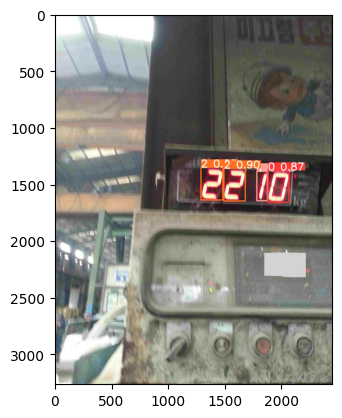

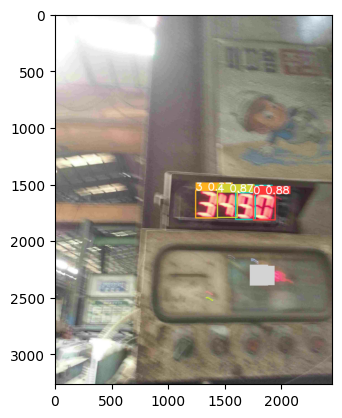

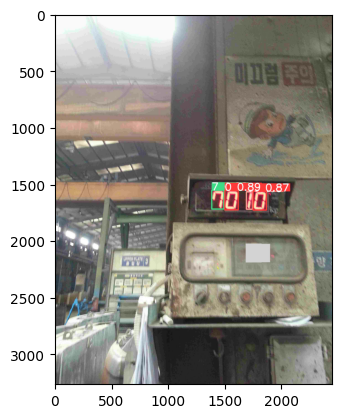

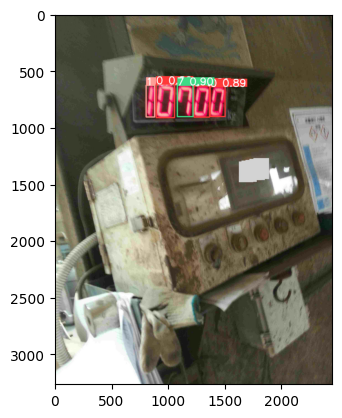

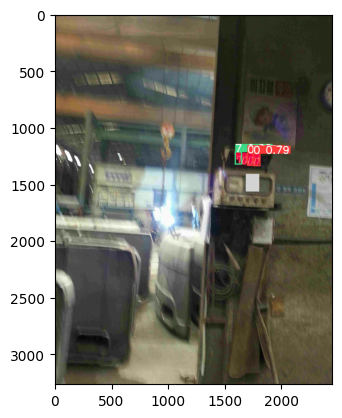

In [ ]:
# 지정된 폴더에서 이미지를 로드합니다. 폴더 경로는 오른쪽 클릭 후 'copy (file) path'로 확인할 수 있습니다.
test_predict_path = f'{project}/{test_inference_name}'

# glob 함수를 이용하여 지정 폴더 내의 모든 jpg 파일을 가져옵니다.
# 이미지 폴더 내의 jpg 형식을 가진 모든 파일을 읽어들입니다.
all_test_predict_list = glob.glob(test_predict_path+'/*jpg')

# randome 함수를 통해 전체 이미지에서 10개를 임의로 추출합니다.
sample_list = random.sample(all_test_predict_list, 5)

# matplotlib의 imread 함수는 파일의 경로를 입력받아 (높이, 너비, 채널 수)의 3차원 배열 형태로 반환합니다.
# matplotlib의 imshow 함수는 넘파이 배열을 입력받아 이미지를 사용자가 보기쉬운 사이즈로 조정하여 보여주며, 실제 크기를 짐작할수 있도록 눈금을 제공합니다.
for random_image_path in sample_list:
    image = plt.imread(random_image_path)
    plt.imshow(image)
    plt.show()

# 🆙 Assignment1: 아래의 요구사항에 맞추어 predict함수를 완성하고, 이를 실행하여 마크다운 셀의 괄호 안에 모델의 추론 결과를 기입하세요.

**학번: {여기에 각자의 학번 서술}**   
**이름: {본인의 이름을 기재}**   

## Inference with Real Test dataset(마스킹 되지 않은 실제 Test 데이터에 대한 추론)

- project, source, name를 해당 추론 path에 맞게끔 지정
- device를 GPU로 지정
- imgsz(입력 이미지를 640으로 지정)
- conf를 이용하여 모델의 confidence가 50% 이상일 때만 Predict하게끔 지정
- save를 이용하여 모델의 추론 결과를 저장
- save_txt를 이용하여 모델이 예측한 라벨과 그 좌표를 txt파일로 저장
- save_conf를 이용하여 txt 파일에 confidence score를 저장
- show_conf를 이용하여 모델의 추론 결과 이미지에 confidence score를 시각화
- exist_ok를 이용하여 추론 결과를 저장할 디렉토리가 존재한다면 대체하도록 지정

In [ ]:
real_test_inference_name = "real_test_predict"

In [ ]:
image_paths = glob.glob('./dataset/data/real_test_images/*jpg')
# 설정한 배치 크기
batch_size = 4

real_test_inference_results = []
# 이미지 경로를 배치 크기에 맞춰 분할
for i in tqdm(range(0, len(image_paths), batch_size)):
    batch_paths = image_paths[i:i + batch_size]
    results = model.predict(
        '''
        아래의 요구사항에 맞춰 predict 함수를 완성하고 직접 추론 코드를 실행하세요.
        - project, source, name를 해당 추론 path에 맞게끔 지정
        - device를 GPU로 지정
        - imgsz를 이용하여 입력 이미지를 640 크기로 지정
        - conf를 이용하여 모델의 confidence가 50% 이상일 때만 Predict하게끔 지정
        - save를 이용하여 모델의 추론 결과를 저장
        - save_txt를 이용하여 모델이 예측한 라벨과 그 좌표를 txt파일로 저장
        - save_conf를 이용하여 txt 파일에 confidence score를 저장
        - show_conf를 이용하여 모델의 추론 결과 이미지에 confidence score를 시각화
        - exist_ok를 이용하여 추론 결과를 저장할 디렉토리가 존재한다면 대체하도록 지정
        '''
        )

    # 결과에서 원본 이미지 삭제하여 메모리 절약
    for item in results:
        del item.orig_img
    real_test_inference_results.append(results)

# 배치사이즈 만큼 묶여 있는 리스트를 풀어줌
real_test_inference_results = sum(real_test_inference_results,[])

# 🆙 Assignment2: 앞선 실습을 참고하여 개별 라벨 기준 정확도와 이미지 기준 정확도를 소수점 4자리까지 출력하고 마크다운 셀에 본인의 정확도를 기입하세요.

In [ ]:
test_label_path = './dataset/data/covered_images/test_data'

# compute_each_label_accuracy 함수 사용 (큰 화면에 대한 라벨 정보만을 비교하기 위해 해당 라벨의 path를 입력)
"""
코드를 완성하세요.
"""

**실제 테스트셋에 대한 정확도(개별 라벨 기준)는 (본인이 실행한 정확도를 기입하세요)%**

In [ ]:
# compute_image_accuracy 함수 사용
"""
코드를 완성하세요.
"""

**실제 테스트셋에 대한 정확도(이미지 기준)는 (본인이 실행한 정확도를 기입하세요)%**

In [ ]:
# 지정된 폴더에서 이미지를 로드합니다. 폴더 경로는 오른쪽 클릭 후 'copy (file) path'로 확인할 수 있습니다.
real_test_predict_path = f'{project}/{real_test_inference_name}'


# glob 함수를 이용하여 지정 폴더 내의 모든 jpg 파일을 가져옵니다.
# 이미지 폴더 내의 jpg 형식을 가진 모든 파일을 읽어들입니다.
all_real_test_predict_list = glob.glob(real_test_predict_path+'/*jpg')

# randome 함수를 통해 전체 이미지에서 10개를 임의로 추출합니다.
sample_list = random.sample(all_real_test_predict_list, 5)

# matplotlib의 imread 함수는 파일의 경로를 입력받아 (높이, 너비, 채널 수)의 3차원 배열 형태로 반환합니다.
# matplotlib의 imshow 함수는 넘파이 배열을 입력받아 이미지를 사용자가 보기쉬운 사이즈로 조정하여 보여주며, 실제 크기를 짐작할수 있도록 눈금을 제공합니다.
# 시각화 결과 대부분 이미지에서 탐지가 제대로 되었음을 알 수 있습니다.
for random_image_path in sample_list:
    image = plt.imread(random_image_path)
    plt.imshow(image)
    plt.show()

# 🆙 Assignment3: 아래의 코드를 실행하고, 마크다운 셀의 괄호 안에 모델의 추론 결과와 해당 결과를 개선하기 위한 방안에 대해서 서술하세요.

**모델의 추론 결과: {결과가 어떠한지 서술하세요. ex: ~한 것으로 보아 추론을 잘 수행한다. }**   
**개선하기 위한 방안: {개선하기 위한 방안에 대해 서술하세요. ex: 추론 결과로 보아 ~한 상황이므로 개선하기 위해 ~한 방안을 적용할 수 있을 것이다.}**   

In [ ]:
assignment_inference_name = "assignment_predict"

In [ ]:
assignment_inference_results = model.predict(source='./dataset/assignment_images', name=assignment_inference_name, device='cuda', imgsz=640, save=True, save_txt=True, save_conf=True, exist_ok=True)

In [ ]:
# 지정된 폴더에서 이미지를 로드합니다. 폴더 경로는 오른쪽 클릭 후 'copy (file) path'로 확인할 수 있습니다.
assignment_predict_path = 'runs/detect/assignment_predict'

# glob 함수를 이용하여 지정 폴더 내의 모든 jpg 파일을 가져옵니다.
# 이미지 폴더 내의 jpg 형식을 가진 모든 파일을 읽어들입니다.
assignment_predict_list = glob.glob(assignment_predict_path+'/*jpg')

# matplotlib의 imread 함수는 파일의 경로를 입력받아 (높이, 너비, 채널 수)의 3차원 배열 형태로 반환합니다.
# matplotlib의 imshow 함수는 넘파이 배열을 입력받아 이미지를 사용자가 보기쉬운 사이즈로 조정하여 보여주며, 실제 크기를 짐작할수 있도록 눈금을 제공합니다.
for assignment_images in assignment_predict_list:
    image = plt.imread(assignment_images)
    plt.imshow(image)
    plt.show()